In [4]:
import numpy as np

from sklearn.model_selection import train_test_split, GroupKFold
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, precision_score, average_precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, roc_curve

import tensorflow as tf
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling1D, MaxPooling2D, LeakyReLU
from keras.initializers import RandomNormal
import keras.optimizers as opt
from keras.callbacks import TensorBoard, EarlyStopping
from keras.utils import plot_model
from keras.regularizers import l2

In [5]:
data = np.load('../data/data.npy')
meta = np.load('../data/meta.npy')
print(f'data = {data.shape}')
print(f'meta = {meta.shape}')

data = (1845, 21, 77)
meta = (1845, 3)


In [6]:
X = data[:,:,:,np.newaxis]
Y = meta[:,2][:,np.newaxis].astype(int)

In [7]:
shape = X.shape
std = StandardScaler().fit(X.reshape(-1,1))
X = std.transform(X.reshape(-1,1)).reshape(shape)

In [8]:
G = meta[:,0]
print(G.shape, len(np.unique(G)))

(1845,) 17


In [9]:
X,Y,G = shuffle(X,Y,G)

In [10]:
gfold = GroupKFold(n_splits = len(np.unique(G)))

In [99]:
def get_model(cnn_input, cnn_output, l2_lambda = 0.1, drop_rate = 0.75):
    
    model = Sequential()

    model.add(Conv2D(16, (7,7), activation = 'tanh', name = 'conv1', input_shape = cnn_input))
                    #,kernel_regularizer=l2(l2_lambda), bias_regularizer = l2(l2_lambda)))
    model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2), name='maxpool1'))

#     model.add(Dropout(drop_rate, name='drop1'))
    
#     model.add(Conv2D(32, (5,5), activation='tanh', name='conv2'
#                     ,kernel_regularizer=l2(l2_lambda), bias_regularizer = l2(l2_lambda)))
    #model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), name='maxpool2'))

#     model.add(Dropout(drop_rate, name='drop2'))
    
#     model.add(Conv2D(64, (3,3), activation='tanh', name='conv3'
#                     ,kernel_regularizer=l2(l2_lambda), bias_regularizer = l2(l2_lambda)))
    #model.add(MaxPooling2D(pool_size=(2,2), strides = (1,1), name='maxpool3'))

    model.add(Dropout(drop_rate, name='drop3'))
              
    model.add(Flatten(name='flat4'))
    model.add(Dropout(drop_rate, name='drop4'))
    model.add(Dense(1024, activation='tanh', name='dense4'))

    model.add(Dropout(drop_rate, name='drop5'))
              
    model.add(Dense(cnn_output, activation='sigmoid', name='softmax'))
    
    return model

In [100]:
cnn_input = X.shape[1:]
cnn_output = Y.shape[1]
batch_size = 32

print(f"cnn_input  = {cnn_input}")
print(f"cnn_output = {cnn_output}")
print(f"batch_size = {batch_size}")

get_model(cnn_input, cnn_output).summary()

cnn_input  = (21, 77, 1)
cnn_output = 1
batch_size = 32
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 15, 71, 16)        800       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 7, 35, 16)         0         
_________________________________________________________________
drop3 (Dropout)              (None, 7, 35, 16)         0         
_________________________________________________________________
flat4 (Flatten)              (None, 3920)              0         
_________________________________________________________________
drop4 (Dropout)              (None, 3920)              0         
_________________________________________________________________
dense4 (Dense)               (None, 1024)              4015104   
_________________________________________________________________
drop5 (Dropout)     

In [101]:
results = np.append(Y, np.zeros_like(Y), axis = 1)
results = np.append(results, np.zeros_like(Y), axis = 1).astype(float)
results.shape

(1845, 3)

PID: 1.0 TRAIN: 1519 TEST: 326
train: x=(1139, 21, 77, 1) y=(1139, 1)
valid: x=(380, 21, 77, 1) y=(380, 1)
test : x=(326, 21, 77, 1)  y=(326, 1)
Train on 1139 samples, validate on 380 samples
Epoch 1/1000
 - 7s - loss: 0.9682 - acc: 0.4996 - val_loss: 0.6568 - val_acc: 0.6237
Epoch 2/1000
 - 0s - loss: 0.8663 - acc: 0.5268 - val_loss: 0.6682 - val_acc: 0.6079
Epoch 3/1000
 - 0s - loss: 0.8799 - acc: 0.5162 - val_loss: 0.6679 - val_acc: 0.6132
Epoch 4/1000
 - 0s - loss: 0.8532 - acc: 0.5522 - val_loss: 0.6751 - val_acc: 0.6053
Epoch 5/1000
 - 0s - loss: 0.8265 - acc: 0.5724 - val_loss: 0.6744 - val_acc: 0.6079
Epoch 6/1000
 - 0s - loss: 0.7954 - acc: 0.5777 - val_loss: 0.6723 - val_acc: 0.6105
Epoch 7/1000
 - 0s - loss: 0.7899 - acc: 0.5645 - val_loss: 0.6657 - val_acc: 0.6105
Epoch 8/1000
 - 0s - loss: 0.7584 - acc: 0.5944 - val_loss: 0.6692 - val_acc: 0.6026
Epoch 9/1000
 - 0s - loss: 0.7747 - acc: 0.5988 - val_loss: 0.6413 - val_acc: 0.6105
Epoch 10/1000
 - 0s - loss: 0.7337 - acc: 0

 - 1s - loss: 0.4184 - acc: 0.8051 - val_loss: 0.3434 - val_acc: 0.8816
Epoch 95/1000
 - 1s - loss: 0.4002 - acc: 0.8060 - val_loss: 0.3370 - val_acc: 0.8500
Epoch 96/1000
 - 0s - loss: 0.4082 - acc: 0.8068 - val_loss: 0.3218 - val_acc: 0.9053
Epoch 97/1000
 - 0s - loss: 0.4232 - acc: 0.8121 - val_loss: 0.3249 - val_acc: 0.8816
Epoch 98/1000
 - 0s - loss: 0.4079 - acc: 0.8139 - val_loss: 0.3177 - val_acc: 0.9132
Epoch 99/1000
 - 0s - loss: 0.4015 - acc: 0.8323 - val_loss: 0.3373 - val_acc: 0.8605
Epoch 100/1000
 - 0s - loss: 0.4128 - acc: 0.7998 - val_loss: 0.4606 - val_acc: 0.7816
Epoch 101/1000
 - 0s - loss: 0.3966 - acc: 0.8130 - val_loss: 0.3849 - val_acc: 0.7816
Epoch 102/1000
 - 0s - loss: 0.4033 - acc: 0.8156 - val_loss: 0.3244 - val_acc: 0.8737
Epoch 103/1000
 - 0s - loss: 0.3891 - acc: 0.8218 - val_loss: 0.3203 - val_acc: 0.8921
Epoch 104/1000
 - 0s - loss: 0.4046 - acc: 0.8235 - val_loss: 0.3066 - val_acc: 0.9053
Epoch 105/1000
 - 0s - loss: 0.3867 - acc: 0.8279 - val_loss: 0

Epoch 189/1000
 - 0s - loss: 0.3319 - acc: 0.8630 - val_loss: 0.2071 - val_acc: 0.9553
Epoch 190/1000
 - 0s - loss: 0.3002 - acc: 0.8911 - val_loss: 0.2598 - val_acc: 0.9026
Epoch 191/1000
 - 0s - loss: 0.3609 - acc: 0.8543 - val_loss: 0.2010 - val_acc: 0.9526
Epoch 192/1000
 - 1s - loss: 0.3276 - acc: 0.8586 - val_loss: 0.4244 - val_acc: 0.8237
Epoch 193/1000
 - 0s - loss: 0.3153 - acc: 0.8753 - val_loss: 0.2492 - val_acc: 0.9079
Epoch 194/1000
 - 0s - loss: 0.3367 - acc: 0.8543 - val_loss: 0.2510 - val_acc: 0.9026
Epoch 195/1000
 - 0s - loss: 0.3010 - acc: 0.8850 - val_loss: 0.2052 - val_acc: 0.9526
Epoch 196/1000
 - 0s - loss: 0.2806 - acc: 0.8929 - val_loss: 0.2208 - val_acc: 0.9526
Epoch 197/1000
 - 0s - loss: 0.3088 - acc: 0.8727 - val_loss: 0.3173 - val_acc: 0.8763
Epoch 198/1000
 - 0s - loss: 0.3111 - acc: 0.8771 - val_loss: 0.2974 - val_acc: 0.8789
Epoch 199/1000
 - 1s - loss: 0.2985 - acc: 0.8850 - val_loss: 0.2146 - val_acc: 0.9632
Epoch 200/1000
 - 1s - loss: 0.2800 - acc: 

 - 0s - loss: 0.2856 - acc: 0.8885 - val_loss: 0.1599 - val_acc: 0.9684
Epoch 284/1000
 - 0s - loss: 0.2791 - acc: 0.8850 - val_loss: 0.1936 - val_acc: 0.9447
Epoch 285/1000
 - 0s - loss: 0.2787 - acc: 0.8946 - val_loss: 0.1613 - val_acc: 0.9632
Epoch 286/1000
 - 0s - loss: 0.2732 - acc: 0.8859 - val_loss: 0.8572 - val_acc: 0.7816
Epoch 287/1000
 - 0s - loss: 0.2955 - acc: 0.8859 - val_loss: 0.1625 - val_acc: 0.9684
Epoch 288/1000
 - 0s - loss: 0.2621 - acc: 0.8946 - val_loss: 0.2894 - val_acc: 0.8974
Epoch 289/1000
 - 0s - loss: 0.2891 - acc: 0.8867 - val_loss: 0.1644 - val_acc: 0.9632
Epoch 290/1000
 - 0s - loss: 0.2797 - acc: 0.8911 - val_loss: 0.1621 - val_acc: 0.9579
Epoch 291/1000
 - 0s - loss: 0.2512 - acc: 0.8999 - val_loss: 0.1794 - val_acc: 0.9579
Epoch 292/1000
 - 0s - loss: 0.2685 - acc: 0.9025 - val_loss: 0.1717 - val_acc: 0.9632
Restoring model weights from the end of the best epoch
Epoch 00292: early stopping
326/326 [==============================] - 0s 62us/step
Testin

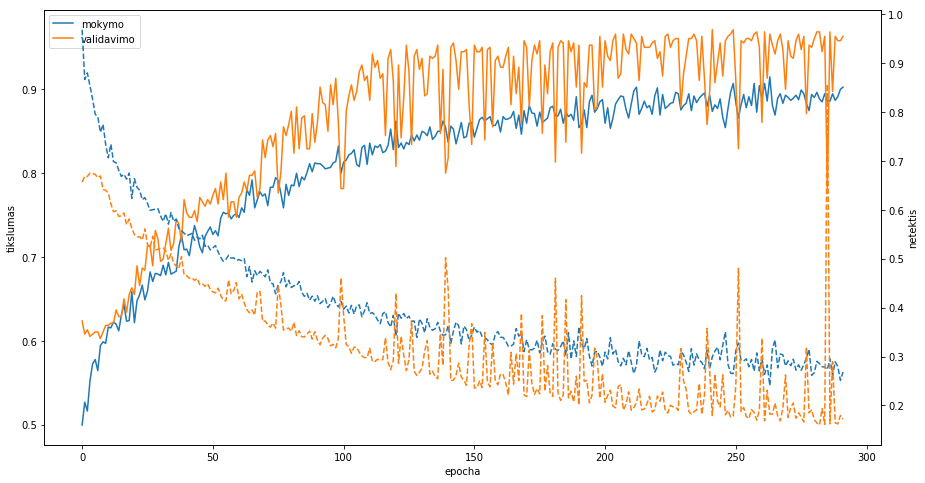

PID: 212.0 TRAIN: 1556 TEST: 289
train: x=(1167, 21, 77, 1) y=(1167, 1)
valid: x=(389, 21, 77, 1) y=(389, 1)
test : x=(289, 21, 77, 1)  y=(289, 1)
Train on 1167 samples, validate on 389 samples
Epoch 1/1000
 - 7s - loss: 0.9498 - acc: 0.5141 - val_loss: 0.5186 - val_acc: 0.8329
Epoch 2/1000
 - 0s - loss: 0.7251 - acc: 0.6033 - val_loss: 0.4370 - val_acc: 0.8380
Epoch 3/1000
 - 0s - loss: 0.6336 - acc: 0.6667 - val_loss: 0.4228 - val_acc: 0.8380
Epoch 4/1000
 - 0s - loss: 0.5874 - acc: 0.7198 - val_loss: 0.4312 - val_acc: 0.8380
Epoch 5/1000
 - 0s - loss: 0.5625 - acc: 0.7335 - val_loss: 0.4348 - val_acc: 0.8380
Epoch 6/1000
 - 0s - loss: 0.5134 - acc: 0.7575 - val_loss: 0.4424 - val_acc: 0.8380
Epoch 7/1000
 - 0s - loss: 0.5234 - acc: 0.7566 - val_loss: 0.4457 - val_acc: 0.8380
Epoch 8/1000
 - 0s - loss: 0.4996 - acc: 0.7763 - val_loss: 0.4459 - val_acc: 0.8380
Epoch 9/1000
 - 0s - loss: 0.4801 - acc: 0.7721 - val_loss: 0.4446 - val_acc: 0.8380
Epoch 10/1000
 - 0s - loss: 0.4796 - acc:

 - 0s - loss: 0.3007 - acc: 0.8937 - val_loss: 0.3718 - val_acc: 0.8895
Epoch 95/1000
 - 0s - loss: 0.2993 - acc: 0.8963 - val_loss: 0.3595 - val_acc: 0.9023
Epoch 96/1000
 - 0s - loss: 0.2949 - acc: 0.8972 - val_loss: 0.3596 - val_acc: 0.8920
Epoch 97/1000
 - 0s - loss: 0.3092 - acc: 0.8946 - val_loss: 0.3708 - val_acc: 0.8997
Epoch 98/1000
 - 0s - loss: 0.2946 - acc: 0.8937 - val_loss: 0.3669 - val_acc: 0.9023
Epoch 99/1000
 - 0s - loss: 0.2949 - acc: 0.8989 - val_loss: 0.3850 - val_acc: 0.8946
Epoch 100/1000
 - 0s - loss: 0.3005 - acc: 0.8920 - val_loss: 0.3577 - val_acc: 0.8997
Epoch 101/1000
 - 0s - loss: 0.2879 - acc: 0.8980 - val_loss: 0.3674 - val_acc: 0.8972
Epoch 102/1000
 - 0s - loss: 0.3069 - acc: 0.8895 - val_loss: 0.3596 - val_acc: 0.8946
Epoch 103/1000
 - 0s - loss: 0.2868 - acc: 0.9049 - val_loss: 0.3505 - val_acc: 0.9177
Epoch 104/1000
 - 0s - loss: 0.2786 - acc: 0.8997 - val_loss: 0.3557 - val_acc: 0.9075
Epoch 105/1000
 - 0s - loss: 0.2799 - acc: 0.9057 - val_loss: 0

Epoch 189/1000
 - 0s - loss: 0.2435 - acc: 0.9109 - val_loss: 0.2836 - val_acc: 0.9332
Epoch 190/1000
 - 0s - loss: 0.2184 - acc: 0.9220 - val_loss: 0.2762 - val_acc: 0.9409
Epoch 191/1000
 - 0s - loss: 0.2276 - acc: 0.9237 - val_loss: 0.2714 - val_acc: 0.9332
Epoch 192/1000
 - 0s - loss: 0.2211 - acc: 0.9160 - val_loss: 0.3115 - val_acc: 0.9126
Epoch 193/1000
 - 0s - loss: 0.2118 - acc: 0.9254 - val_loss: 0.2648 - val_acc: 0.9254
Epoch 194/1000
 - 0s - loss: 0.2087 - acc: 0.9263 - val_loss: 0.2648 - val_acc: 0.9357
Epoch 195/1000
 - 0s - loss: 0.2214 - acc: 0.9246 - val_loss: 0.2631 - val_acc: 0.9332
Epoch 196/1000
 - 0s - loss: 0.2024 - acc: 0.9220 - val_loss: 0.2834 - val_acc: 0.9357
Epoch 197/1000
 - 0s - loss: 0.2152 - acc: 0.9289 - val_loss: 0.2596 - val_acc: 0.9332
Epoch 198/1000
 - 0s - loss: 0.2038 - acc: 0.9323 - val_loss: 0.2843 - val_acc: 0.9152
Epoch 199/1000
 - 0s - loss: 0.2112 - acc: 0.9220 - val_loss: 0.2629 - val_acc: 0.9383
Epoch 200/1000
 - 0s - loss: 0.2052 - acc: 

 - 0s - loss: 0.1951 - acc: 0.9280 - val_loss: 0.2327 - val_acc: 0.9383
Epoch 284/1000
 - 0s - loss: 0.1949 - acc: 0.9289 - val_loss: 0.2376 - val_acc: 0.9434
Epoch 285/1000
 - 1s - loss: 0.1865 - acc: 0.9383 - val_loss: 0.2232 - val_acc: 0.9460
Epoch 286/1000
 - 1s - loss: 0.1888 - acc: 0.9263 - val_loss: 0.2218 - val_acc: 0.9460
Epoch 287/1000
 - 1s - loss: 0.1763 - acc: 0.9340 - val_loss: 0.2262 - val_acc: 0.9486
Epoch 288/1000
 - 0s - loss: 0.2019 - acc: 0.9297 - val_loss: 0.2447 - val_acc: 0.9332
Epoch 289/1000
 - 0s - loss: 0.1741 - acc: 0.9349 - val_loss: 0.2239 - val_acc: 0.9460
Epoch 290/1000
 - 0s - loss: 0.1844 - acc: 0.9254 - val_loss: 0.2293 - val_acc: 0.9460
Epoch 291/1000
 - 0s - loss: 0.1710 - acc: 0.9400 - val_loss: 0.2388 - val_acc: 0.9357
Restoring model weights from the end of the best epoch
Epoch 00291: early stopping
289/289 [==============================] - 0s 65us/step
Testing:
loss = 4.5877967309786785
acc = 0.04152249134948097


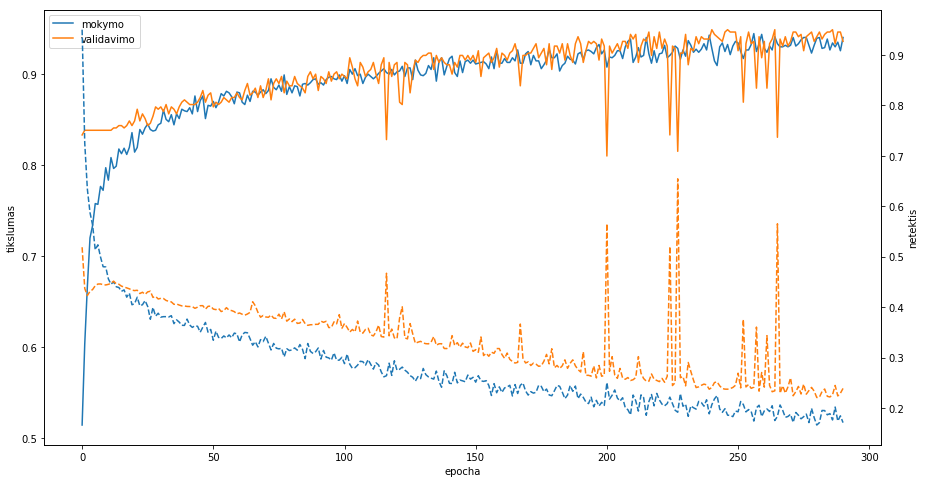

PID: 5.0 TRAIN: 1616 TEST: 229
train: x=(1212, 21, 77, 1) y=(1212, 1)
valid: x=(404, 21, 77, 1) y=(404, 1)
test : x=(229, 21, 77, 1)  y=(229, 1)
Train on 1212 samples, validate on 404 samples
Epoch 1/1000
 - 7s - loss: 0.9572 - acc: 0.5322 - val_loss: 0.7257 - val_acc: 0.5619
Epoch 2/1000
 - 0s - loss: 0.9667 - acc: 0.5355 - val_loss: 0.7244 - val_acc: 0.6040
Epoch 3/1000
 - 0s - loss: 0.8797 - acc: 0.5503 - val_loss: 0.7424 - val_acc: 0.5990
Epoch 4/1000
 - 0s - loss: 0.8701 - acc: 0.5586 - val_loss: 0.7580 - val_acc: 0.5916
Epoch 5/1000
 - 0s - loss: 0.8450 - acc: 0.5660 - val_loss: 0.7535 - val_acc: 0.6040
Epoch 6/1000
 - 1s - loss: 0.8490 - acc: 0.5594 - val_loss: 0.7480 - val_acc: 0.6040
Epoch 7/1000
 - 0s - loss: 0.8206 - acc: 0.5842 - val_loss: 0.7422 - val_acc: 0.6040
Epoch 8/1000
 - 0s - loss: 0.7919 - acc: 0.6081 - val_loss: 0.7394 - val_acc: 0.6040
Epoch 9/1000
 - 0s - loss: 0.7502 - acc: 0.6064 - val_loss: 0.7321 - val_acc: 0.6040
Epoch 10/1000
 - 0s - loss: 0.7291 - acc: 0

 - 0s - loss: 0.4391 - acc: 0.7946 - val_loss: 0.3847 - val_acc: 0.8267
Epoch 95/1000
 - 0s - loss: 0.4473 - acc: 0.7748 - val_loss: 0.3829 - val_acc: 0.8267
Epoch 96/1000
 - 0s - loss: 0.4544 - acc: 0.7805 - val_loss: 0.4026 - val_acc: 0.8094
Epoch 97/1000
 - 0s - loss: 0.4468 - acc: 0.7723 - val_loss: 0.3915 - val_acc: 0.8119
Epoch 98/1000
 - 0s - loss: 0.4389 - acc: 0.7995 - val_loss: 0.3710 - val_acc: 0.8441
Epoch 99/1000
 - 0s - loss: 0.4504 - acc: 0.7929 - val_loss: 0.3641 - val_acc: 0.8490
Epoch 100/1000
 - 1s - loss: 0.4211 - acc: 0.8012 - val_loss: 0.3774 - val_acc: 0.8342
Epoch 101/1000
 - 1s - loss: 0.4423 - acc: 0.7847 - val_loss: 0.3741 - val_acc: 0.8243
Epoch 102/1000
 - 1s - loss: 0.4250 - acc: 0.8020 - val_loss: 0.3750 - val_acc: 0.8292
Epoch 103/1000
 - 1s - loss: 0.4534 - acc: 0.7814 - val_loss: 0.3682 - val_acc: 0.8366
Epoch 104/1000
 - 0s - loss: 0.4459 - acc: 0.7838 - val_loss: 0.3857 - val_acc: 0.8168
Epoch 105/1000
 - 0s - loss: 0.4462 - acc: 0.7888 - val_loss: 0

Epoch 189/1000
 - 0s - loss: 0.3806 - acc: 0.8292 - val_loss: 0.2854 - val_acc: 0.8861
Epoch 190/1000
 - 0s - loss: 0.3494 - acc: 0.8490 - val_loss: 0.2821 - val_acc: 0.8911
Epoch 191/1000
 - 0s - loss: 0.3880 - acc: 0.8383 - val_loss: 0.2873 - val_acc: 0.8861
Epoch 192/1000
 - 0s - loss: 0.3560 - acc: 0.8457 - val_loss: 0.2871 - val_acc: 0.8837
Epoch 193/1000
 - 0s - loss: 0.3694 - acc: 0.8350 - val_loss: 0.2895 - val_acc: 0.8886
Epoch 194/1000
 - 0s - loss: 0.3505 - acc: 0.8581 - val_loss: 0.3534 - val_acc: 0.8441
Epoch 195/1000
 - 0s - loss: 0.3643 - acc: 0.8383 - val_loss: 0.2939 - val_acc: 0.8911
Epoch 196/1000
 - 0s - loss: 0.3380 - acc: 0.8441 - val_loss: 0.2745 - val_acc: 0.8936
Epoch 197/1000
 - 0s - loss: 0.3389 - acc: 0.8597 - val_loss: 0.2794 - val_acc: 0.8861
Epoch 198/1000
 - 0s - loss: 0.3489 - acc: 0.8465 - val_loss: 0.2704 - val_acc: 0.8936
Epoch 199/1000
 - 1s - loss: 0.3619 - acc: 0.8416 - val_loss: 0.2837 - val_acc: 0.8886
Epoch 200/1000
 - 0s - loss: 0.3270 - acc: 

 - 0s - loss: 0.3200 - acc: 0.8688 - val_loss: 0.2179 - val_acc: 0.9158
Epoch 284/1000
 - 0s - loss: 0.3185 - acc: 0.8672 - val_loss: 0.2357 - val_acc: 0.9158
Epoch 285/1000
 - 0s - loss: 0.3253 - acc: 0.8597 - val_loss: 0.2149 - val_acc: 0.9307
Epoch 286/1000
 - 1s - loss: 0.2984 - acc: 0.8820 - val_loss: 0.2138 - val_acc: 0.9233
Epoch 287/1000
 - 1s - loss: 0.2910 - acc: 0.8936 - val_loss: 0.2224 - val_acc: 0.9134
Epoch 288/1000
 - 1s - loss: 0.3316 - acc: 0.8746 - val_loss: 0.2142 - val_acc: 0.9257
Epoch 289/1000
 - 0s - loss: 0.2968 - acc: 0.8812 - val_loss: 0.2115 - val_acc: 0.9208
Epoch 290/1000
 - 0s - loss: 0.3218 - acc: 0.8680 - val_loss: 0.2056 - val_acc: 0.9257
Epoch 291/1000
 - 0s - loss: 0.3389 - acc: 0.8614 - val_loss: 0.2493 - val_acc: 0.9109
Epoch 292/1000
 - 0s - loss: 0.2992 - acc: 0.8771 - val_loss: 0.2152 - val_acc: 0.9257
Epoch 293/1000
 - 0s - loss: 0.3082 - acc: 0.8754 - val_loss: 0.3330 - val_acc: 0.8490
Epoch 294/1000
 - 0s - loss: 0.2910 - acc: 0.8820 - val_lo

Epoch 378/1000
 - 0s - loss: 0.2430 - acc: 0.9002 - val_loss: 0.1703 - val_acc: 0.9455
Epoch 379/1000
 - 0s - loss: 0.2793 - acc: 0.8845 - val_loss: 0.1782 - val_acc: 0.9406
Epoch 380/1000
 - 1s - loss: 0.2759 - acc: 0.8919 - val_loss: 0.7613 - val_acc: 0.7327
Epoch 381/1000
 - 1s - loss: 0.2946 - acc: 0.8903 - val_loss: 0.2157 - val_acc: 0.9233
Epoch 382/1000
 - 0s - loss: 0.2941 - acc: 0.8903 - val_loss: 0.2392 - val_acc: 0.8936
Epoch 383/1000
 - 0s - loss: 0.2499 - acc: 0.8927 - val_loss: 0.1812 - val_acc: 0.9356
Epoch 384/1000
 - 0s - loss: 0.2545 - acc: 0.9010 - val_loss: 0.1746 - val_acc: 0.9356
Epoch 385/1000
 - 0s - loss: 0.2758 - acc: 0.8936 - val_loss: 0.1752 - val_acc: 0.9332
Epoch 386/1000
 - 1s - loss: 0.2326 - acc: 0.9101 - val_loss: 0.1765 - val_acc: 0.9406
Epoch 387/1000
 - 1s - loss: 0.2809 - acc: 0.8762 - val_loss: 0.1688 - val_acc: 0.9381
Epoch 388/1000
 - 1s - loss: 0.3092 - acc: 0.8647 - val_loss: 0.2113 - val_acc: 0.9307
Epoch 389/1000
 - 0s - loss: 0.2734 - acc: 

 - 0s - loss: 0.2332 - acc: 0.9167 - val_loss: 0.1860 - val_acc: 0.9282
Epoch 473/1000
 - 0s - loss: 0.2456 - acc: 0.9018 - val_loss: 0.3308 - val_acc: 0.8713
Epoch 474/1000
 - 0s - loss: 0.2683 - acc: 0.9002 - val_loss: 0.1598 - val_acc: 0.9431
Epoch 475/1000
 - 0s - loss: 0.2348 - acc: 0.9092 - val_loss: 0.1769 - val_acc: 0.9257
Epoch 476/1000
 - 0s - loss: 0.2304 - acc: 0.9125 - val_loss: 0.1529 - val_acc: 0.9480
Epoch 477/1000
 - 0s - loss: 0.2097 - acc: 0.9208 - val_loss: 0.1493 - val_acc: 0.9530
Epoch 478/1000
 - 0s - loss: 0.2494 - acc: 0.9068 - val_loss: 0.1522 - val_acc: 0.9480
Epoch 479/1000
 - 0s - loss: 0.2179 - acc: 0.9175 - val_loss: 0.1491 - val_acc: 0.9505
Epoch 480/1000
 - 0s - loss: 0.2473 - acc: 0.8969 - val_loss: 0.1489 - val_acc: 0.9455
Epoch 481/1000
 - 0s - loss: 0.2266 - acc: 0.9191 - val_loss: 0.1697 - val_acc: 0.9455
Epoch 482/1000
 - 0s - loss: 0.2466 - acc: 0.9051 - val_loss: 0.1867 - val_acc: 0.9381
Epoch 483/1000
 - 0s - loss: 0.2854 - acc: 0.8870 - val_lo

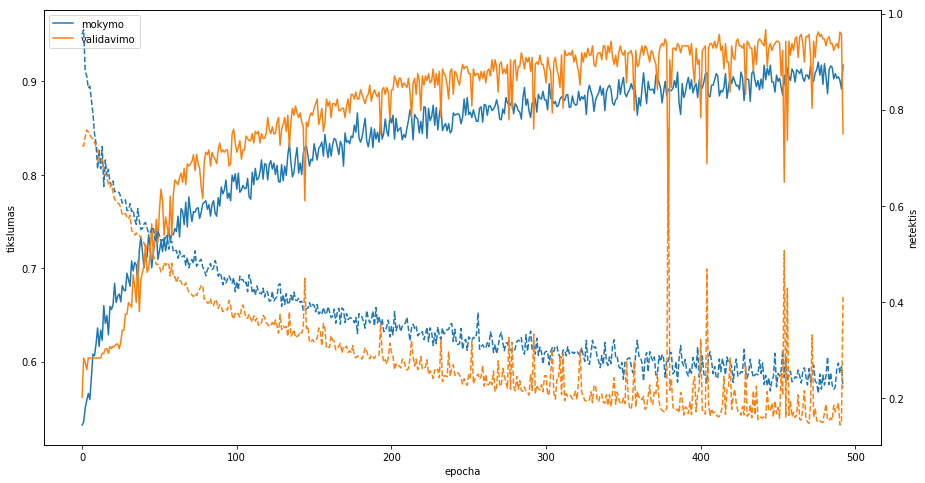

PID: 6.0 TRAIN: 1665 TEST: 180
train: x=(1248, 21, 77, 1) y=(1248, 1)
valid: x=(417, 21, 77, 1) y=(417, 1)
test : x=(180, 21, 77, 1)  y=(180, 1)
Train on 1248 samples, validate on 417 samples
Epoch 1/1000
 - 7s - loss: 1.0138 - acc: 0.4904 - val_loss: 0.6676 - val_acc: 0.6379
Epoch 2/1000
 - 0s - loss: 0.9326 - acc: 0.5369 - val_loss: 0.6486 - val_acc: 0.6619
Epoch 3/1000
 - 0s - loss: 0.8855 - acc: 0.5505 - val_loss: 0.6484 - val_acc: 0.6571
Epoch 4/1000
 - 0s - loss: 0.8350 - acc: 0.5601 - val_loss: 0.6511 - val_acc: 0.6571
Epoch 5/1000
 - 0s - loss: 0.7964 - acc: 0.5913 - val_loss: 0.6574 - val_acc: 0.6499
Epoch 6/1000
 - 0s - loss: 0.7829 - acc: 0.6026 - val_loss: 0.6582 - val_acc: 0.6571
Epoch 7/1000
 - 0s - loss: 0.7927 - acc: 0.5873 - val_loss: 0.6535 - val_acc: 0.6571
Epoch 8/1000
 - 0s - loss: 0.7503 - acc: 0.6058 - val_loss: 0.6475 - val_acc: 0.6571
Epoch 9/1000
 - 1s - loss: 0.7316 - acc: 0.6154 - val_loss: 0.6416 - val_acc: 0.6571
Epoch 10/1000
 - 1s - loss: 0.7532 - acc: 0

 - 0s - loss: 0.3991 - acc: 0.8133 - val_loss: 0.3264 - val_acc: 0.8153
Epoch 95/1000
 - 1s - loss: 0.4139 - acc: 0.7885 - val_loss: 0.3422 - val_acc: 0.8106
Epoch 96/1000
 - 1s - loss: 0.4213 - acc: 0.7957 - val_loss: 0.3235 - val_acc: 0.8465
Epoch 97/1000
 - 0s - loss: 0.4021 - acc: 0.8101 - val_loss: 0.3131 - val_acc: 0.8489
Epoch 98/1000
 - 0s - loss: 0.4105 - acc: 0.8101 - val_loss: 0.3187 - val_acc: 0.8153
Epoch 99/1000
 - 0s - loss: 0.4085 - acc: 0.8053 - val_loss: 0.3240 - val_acc: 0.8225
Epoch 100/1000
 - 0s - loss: 0.4086 - acc: 0.8045 - val_loss: 0.3218 - val_acc: 0.8489
Epoch 101/1000
 - 0s - loss: 0.4059 - acc: 0.8189 - val_loss: 0.3089 - val_acc: 0.8345
Epoch 102/1000
 - 0s - loss: 0.3899 - acc: 0.8133 - val_loss: 0.3246 - val_acc: 0.8153
Epoch 103/1000
 - 0s - loss: 0.4095 - acc: 0.8005 - val_loss: 0.3250 - val_acc: 0.8129
Epoch 104/1000
 - 0s - loss: 0.3878 - acc: 0.8269 - val_loss: 0.3221 - val_acc: 0.8633
Epoch 105/1000
 - 0s - loss: 0.3919 - acc: 0.8101 - val_loss: 0

Epoch 189/1000
 - 1s - loss: 0.3140 - acc: 0.8702 - val_loss: 0.2297 - val_acc: 0.9113
Epoch 190/1000
 - 1s - loss: 0.2814 - acc: 0.8886 - val_loss: 0.2032 - val_acc: 0.9329
Epoch 191/1000
 - 1s - loss: 0.3157 - acc: 0.8726 - val_loss: 0.2284 - val_acc: 0.9209
Epoch 192/1000
 - 1s - loss: 0.3338 - acc: 0.8574 - val_loss: 0.1953 - val_acc: 0.9400
Epoch 193/1000
 - 0s - loss: 0.3017 - acc: 0.8734 - val_loss: 0.1991 - val_acc: 0.9257
Epoch 194/1000
 - 0s - loss: 0.2906 - acc: 0.8830 - val_loss: 0.2019 - val_acc: 0.9281
Epoch 195/1000
 - 0s - loss: 0.3315 - acc: 0.8694 - val_loss: 0.1952 - val_acc: 0.9281
Epoch 196/1000
 - 0s - loss: 0.3101 - acc: 0.8790 - val_loss: 0.5020 - val_acc: 0.8225
Epoch 197/1000
 - 1s - loss: 0.3299 - acc: 0.8678 - val_loss: 0.2055 - val_acc: 0.9281
Epoch 198/1000
 - 1s - loss: 0.3151 - acc: 0.8766 - val_loss: 0.2084 - val_acc: 0.9185
Epoch 199/1000
 - 1s - loss: 0.3276 - acc: 0.8710 - val_loss: 0.2078 - val_acc: 0.9257
Epoch 200/1000
 - 1s - loss: 0.3187 - acc: 

 - 1s - loss: 0.2586 - acc: 0.9006 - val_loss: 0.1745 - val_acc: 0.9329
Epoch 284/1000
 - 1s - loss: 0.2986 - acc: 0.8918 - val_loss: 0.1653 - val_acc: 0.9353
Epoch 285/1000
 - 1s - loss: 0.2722 - acc: 0.8982 - val_loss: 0.1552 - val_acc: 0.9568
Epoch 286/1000
 - 1s - loss: 0.2739 - acc: 0.8846 - val_loss: 0.1611 - val_acc: 0.9353
Epoch 287/1000
 - 1s - loss: 0.2807 - acc: 0.9022 - val_loss: 0.1831 - val_acc: 0.9281
Epoch 288/1000
 - 1s - loss: 0.2704 - acc: 0.8990 - val_loss: 0.1521 - val_acc: 0.9424
Epoch 289/1000
 - 1s - loss: 0.2720 - acc: 0.8918 - val_loss: 0.1527 - val_acc: 0.9448
Epoch 290/1000
 - 1s - loss: 0.2233 - acc: 0.9207 - val_loss: 0.2271 - val_acc: 0.9065
Epoch 291/1000
 - 1s - loss: 0.2468 - acc: 0.9103 - val_loss: 0.1533 - val_acc: 0.9448
Epoch 292/1000
 - 1s - loss: 0.2605 - acc: 0.9054 - val_loss: 0.1770 - val_acc: 0.9424
Epoch 293/1000
 - 1s - loss: 0.2608 - acc: 0.8974 - val_loss: 0.1531 - val_acc: 0.9496
Epoch 294/1000
 - 1s - loss: 0.2781 - acc: 0.9006 - val_lo

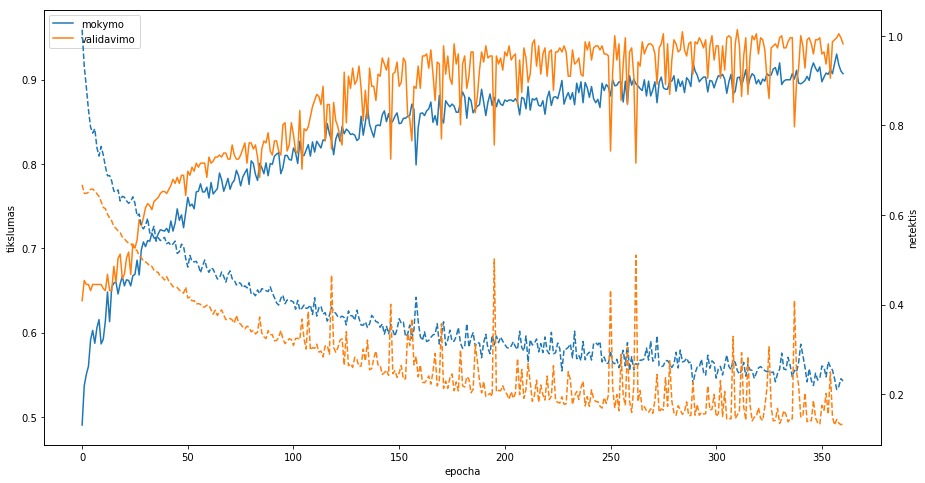

PID: 208.0 TRAIN: 1677 TEST: 168
train: x=(1257, 21, 77, 1) y=(1257, 1)
valid: x=(420, 21, 77, 1) y=(420, 1)
test : x=(168, 21, 77, 1)  y=(168, 1)
Train on 1257 samples, validate on 420 samples
Epoch 1/1000
 - 7s - loss: 0.8842 - acc: 0.5489 - val_loss: 0.5986 - val_acc: 0.7714
Epoch 2/1000
 - 0s - loss: 0.8041 - acc: 0.6181 - val_loss: 0.6089 - val_acc: 0.7714
Epoch 3/1000
 - 0s - loss: 0.7822 - acc: 0.6293 - val_loss: 0.6233 - val_acc: 0.7714
Epoch 4/1000
 - 0s - loss: 0.7055 - acc: 0.6762 - val_loss: 0.6359 - val_acc: 0.7714
Epoch 5/1000
 - 0s - loss: 0.7112 - acc: 0.6826 - val_loss: 0.6239 - val_acc: 0.7714
Epoch 6/1000
 - 0s - loss: 0.7206 - acc: 0.6770 - val_loss: 0.6235 - val_acc: 0.7714
Epoch 7/1000
 - 0s - loss: 0.6784 - acc: 0.7080 - val_loss: 0.6154 - val_acc: 0.7714
Epoch 8/1000
 - 0s - loss: 0.6560 - acc: 0.7271 - val_loss: 0.6080 - val_acc: 0.7714
Epoch 9/1000
 - 0s - loss: 0.6425 - acc: 0.7152 - val_loss: 0.5963 - val_acc: 0.7714
Epoch 10/1000
 - 0s - loss: 0.6060 - acc:

 - 0s - loss: 0.3628 - acc: 0.8457 - val_loss: 0.2690 - val_acc: 0.8929
Epoch 95/1000
 - 0s - loss: 0.3580 - acc: 0.8433 - val_loss: 0.2710 - val_acc: 0.9000
Epoch 96/1000
 - 0s - loss: 0.3720 - acc: 0.8409 - val_loss: 0.2720 - val_acc: 0.8952
Epoch 97/1000
 - 0s - loss: 0.3783 - acc: 0.8337 - val_loss: 0.3140 - val_acc: 0.8762
Epoch 98/1000
 - 1s - loss: 0.3639 - acc: 0.8528 - val_loss: 0.2736 - val_acc: 0.8976
Epoch 99/1000
 - 1s - loss: 0.3367 - acc: 0.8560 - val_loss: 0.2657 - val_acc: 0.8976
Epoch 100/1000
 - 1s - loss: 0.3652 - acc: 0.8496 - val_loss: 0.2895 - val_acc: 0.8833
Epoch 101/1000
 - 1s - loss: 0.3594 - acc: 0.8616 - val_loss: 0.3245 - val_acc: 0.8786
Epoch 102/1000
 - 1s - loss: 0.3558 - acc: 0.8433 - val_loss: 0.2705 - val_acc: 0.8976
Epoch 103/1000
 - 1s - loss: 0.3747 - acc: 0.8353 - val_loss: 0.2640 - val_acc: 0.9024
Epoch 104/1000
 - 0s - loss: 0.3537 - acc: 0.8504 - val_loss: 0.2961 - val_acc: 0.8929
Epoch 105/1000
 - 0s - loss: 0.3532 - acc: 0.8512 - val_loss: 0

Epoch 189/1000
 - 1s - loss: 0.3029 - acc: 0.8671 - val_loss: 0.2398 - val_acc: 0.9143
Epoch 190/1000
 - 1s - loss: 0.2726 - acc: 0.8894 - val_loss: 0.2315 - val_acc: 0.9238
Epoch 191/1000
 - 1s - loss: 0.2977 - acc: 0.8663 - val_loss: 0.3698 - val_acc: 0.8524
Epoch 192/1000
 - 1s - loss: 0.3089 - acc: 0.8711 - val_loss: 0.2263 - val_acc: 0.9238
Epoch 193/1000
 - 1s - loss: 0.2851 - acc: 0.8759 - val_loss: 0.3170 - val_acc: 0.8857
Epoch 194/1000
 - 1s - loss: 0.3015 - acc: 0.8743 - val_loss: 0.2214 - val_acc: 0.9310
Epoch 195/1000
 - 1s - loss: 0.3018 - acc: 0.8663 - val_loss: 0.2374 - val_acc: 0.9167
Epoch 196/1000
 - 1s - loss: 0.2775 - acc: 0.8807 - val_loss: 0.2282 - val_acc: 0.9238
Epoch 197/1000
 - 0s - loss: 0.3075 - acc: 0.8735 - val_loss: 0.3975 - val_acc: 0.8476
Epoch 198/1000
 - 0s - loss: 0.3013 - acc: 0.8719 - val_loss: 0.2233 - val_acc: 0.9238
Epoch 199/1000
 - 0s - loss: 0.2989 - acc: 0.8751 - val_loss: 0.2503 - val_acc: 0.9000
Epoch 200/1000
 - 0s - loss: 0.2870 - acc: 

 - 0s - loss: 0.2603 - acc: 0.8966 - val_loss: 0.2206 - val_acc: 0.9190
Epoch 284/1000
 - 0s - loss: 0.2737 - acc: 0.8870 - val_loss: 0.2072 - val_acc: 0.9286
Epoch 285/1000
 - 0s - loss: 0.2467 - acc: 0.9077 - val_loss: 0.2490 - val_acc: 0.9071
Epoch 286/1000
 - 0s - loss: 0.2509 - acc: 0.8870 - val_loss: 0.2026 - val_acc: 0.9333
Epoch 287/1000
 - 0s - loss: 0.2540 - acc: 0.8910 - val_loss: 0.2641 - val_acc: 0.9071
Restoring model weights from the end of the best epoch
Epoch 00287: early stopping
168/168 [==============================] - 0s 73us/step
Testing:
loss = 1.3517579975582303
acc = 0.09523809523809523


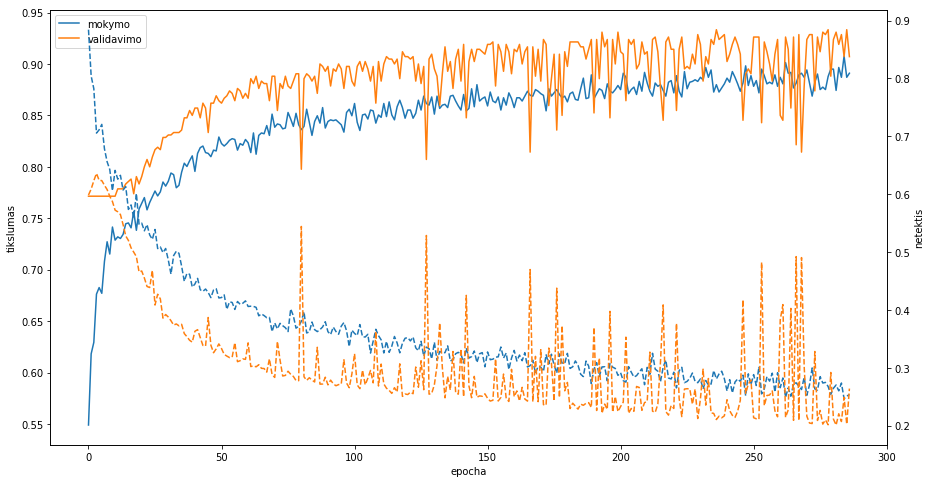

PID: 0.0 TRAIN: 1726 TEST: 119
train: x=(1294, 21, 77, 1) y=(1294, 1)
valid: x=(432, 21, 77, 1) y=(432, 1)
test : x=(119, 21, 77, 1)  y=(119, 1)
Train on 1294 samples, validate on 432 samples
Epoch 1/1000
 - 7s - loss: 0.9662 - acc: 0.5093 - val_loss: 0.6537 - val_acc: 0.6597
Epoch 2/1000
 - 0s - loss: 0.9079 - acc: 0.5425 - val_loss: 0.6514 - val_acc: 0.6597
Epoch 3/1000
 - 0s - loss: 0.9016 - acc: 0.5533 - val_loss: 0.6796 - val_acc: 0.6597
Epoch 4/1000
 - 0s - loss: 0.8477 - acc: 0.5734 - val_loss: 0.7018 - val_acc: 0.6597
Epoch 5/1000
 - 0s - loss: 0.7798 - acc: 0.6260 - val_loss: 0.7183 - val_acc: 0.6597
Epoch 6/1000
 - 0s - loss: 0.7289 - acc: 0.6267 - val_loss: 0.7248 - val_acc: 0.6597
Epoch 7/1000
 - 0s - loss: 0.7683 - acc: 0.6028 - val_loss: 0.7085 - val_acc: 0.6597
Epoch 8/1000
 - 0s - loss: 0.7438 - acc: 0.6291 - val_loss: 0.7017 - val_acc: 0.6597
Epoch 9/1000
 - 0s - loss: 0.7151 - acc: 0.6314 - val_loss: 0.7131 - val_acc: 0.6574
Epoch 10/1000
 - 0s - loss: 0.7190 - acc: 0

 - 1s - loss: 0.4124 - acc: 0.8184 - val_loss: 0.3590 - val_acc: 0.8819
Epoch 95/1000
 - 1s - loss: 0.4027 - acc: 0.8223 - val_loss: 0.3578 - val_acc: 0.8796
Epoch 96/1000
 - 1s - loss: 0.4002 - acc: 0.8114 - val_loss: 0.5013 - val_acc: 0.7801
Epoch 97/1000
 - 1s - loss: 0.4163 - acc: 0.8145 - val_loss: 0.3351 - val_acc: 0.8958
Epoch 98/1000
 - 0s - loss: 0.3995 - acc: 0.8253 - val_loss: 0.3278 - val_acc: 0.8981
Epoch 99/1000
 - 0s - loss: 0.3841 - acc: 0.8369 - val_loss: 0.5798 - val_acc: 0.7616
Epoch 100/1000
 - 0s - loss: 0.4231 - acc: 0.8053 - val_loss: 0.3533 - val_acc: 0.8750
Epoch 101/1000
 - 0s - loss: 0.3655 - acc: 0.8547 - val_loss: 0.3302 - val_acc: 0.8981
Epoch 102/1000
 - 0s - loss: 0.3884 - acc: 0.8485 - val_loss: 0.3336 - val_acc: 0.8796
Epoch 103/1000
 - 1s - loss: 0.3632 - acc: 0.8439 - val_loss: 0.3556 - val_acc: 0.8843
Epoch 104/1000
 - 1s - loss: 0.3708 - acc: 0.8416 - val_loss: 0.3481 - val_acc: 0.8866
Epoch 105/1000
 - 1s - loss: 0.3953 - acc: 0.8215 - val_loss: 0

Epoch 189/1000
 - 1s - loss: 0.2801 - acc: 0.8910 - val_loss: 0.4221 - val_acc: 0.8542
Epoch 190/1000
 - 1s - loss: 0.2883 - acc: 0.8879 - val_loss: 0.3410 - val_acc: 0.8542
Epoch 191/1000
 - 1s - loss: 0.3086 - acc: 0.8895 - val_loss: 0.2254 - val_acc: 0.9352
Epoch 192/1000
 - 1s - loss: 0.3057 - acc: 0.8756 - val_loss: 0.2232 - val_acc: 0.9167
Epoch 193/1000
 - 1s - loss: 0.2826 - acc: 0.8872 - val_loss: 0.2163 - val_acc: 0.9352
Epoch 194/1000
 - 1s - loss: 0.3008 - acc: 0.8833 - val_loss: 0.2182 - val_acc: 0.9282
Epoch 195/1000
 - 0s - loss: 0.2738 - acc: 0.9026 - val_loss: 0.2107 - val_acc: 0.9352
Epoch 196/1000
 - 0s - loss: 0.2933 - acc: 0.8949 - val_loss: 0.2363 - val_acc: 0.9213
Epoch 197/1000
 - 0s - loss: 0.2731 - acc: 0.8802 - val_loss: 0.2476 - val_acc: 0.9259
Epoch 198/1000
 - 0s - loss: 0.2766 - acc: 0.8918 - val_loss: 0.5704 - val_acc: 0.8102
Epoch 199/1000
 - 0s - loss: 0.3136 - acc: 0.8717 - val_loss: 0.2083 - val_acc: 0.9329
Epoch 200/1000
 - 1s - loss: 0.3475 - acc: 

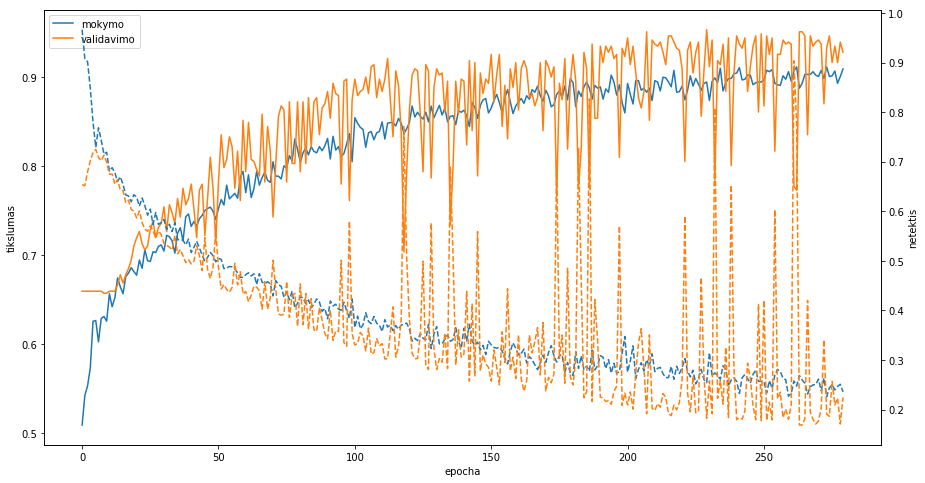

PID: 4.0 TRAIN: 1728 TEST: 117
train: x=(1296, 21, 77, 1) y=(1296, 1)
valid: x=(432, 21, 77, 1) y=(432, 1)
test : x=(117, 21, 77, 1)  y=(117, 1)
Train on 1296 samples, validate on 432 samples
Epoch 1/1000
 - 7s - loss: 1.0008 - acc: 0.5000 - val_loss: 0.6532 - val_acc: 0.6481
Epoch 2/1000
 - 0s - loss: 0.8955 - acc: 0.5440 - val_loss: 0.6277 - val_acc: 0.6991
Epoch 3/1000
 - 0s - loss: 0.8906 - acc: 0.5394 - val_loss: 0.6222 - val_acc: 0.6991
Epoch 4/1000
 - 0s - loss: 0.8471 - acc: 0.5486 - val_loss: 0.6248 - val_acc: 0.6991
Epoch 5/1000
 - 0s - loss: 0.8270 - acc: 0.5455 - val_loss: 0.6300 - val_acc: 0.6991
Epoch 6/1000
 - 0s - loss: 0.8248 - acc: 0.5525 - val_loss: 0.6231 - val_acc: 0.6991
Epoch 7/1000
 - 0s - loss: 0.8065 - acc: 0.5872 - val_loss: 0.6169 - val_acc: 0.6991
Epoch 8/1000
 - 0s - loss: 0.7553 - acc: 0.5926 - val_loss: 0.6099 - val_acc: 0.6991
Epoch 9/1000
 - 0s - loss: 0.7563 - acc: 0.5995 - val_loss: 0.6142 - val_acc: 0.7083
Epoch 10/1000
 - 1s - loss: 0.7311 - acc: 0

 - 0s - loss: 0.4851 - acc: 0.7623 - val_loss: 0.3517 - val_acc: 0.8333
Epoch 95/1000
 - 0s - loss: 0.4824 - acc: 0.7662 - val_loss: 0.3647 - val_acc: 0.8264
Epoch 96/1000
 - 0s - loss: 0.4850 - acc: 0.7539 - val_loss: 0.3639 - val_acc: 0.8287
Epoch 97/1000
 - 0s - loss: 0.4670 - acc: 0.7670 - val_loss: 0.3644 - val_acc: 0.8171
Epoch 98/1000
 - 0s - loss: 0.4863 - acc: 0.7577 - val_loss: 0.3829 - val_acc: 0.8125
Epoch 99/1000
 - 1s - loss: 0.4558 - acc: 0.7793 - val_loss: 0.3532 - val_acc: 0.8495
Epoch 100/1000
 - 1s - loss: 0.4678 - acc: 0.7809 - val_loss: 0.3523 - val_acc: 0.8333
Epoch 101/1000
 - 1s - loss: 0.4619 - acc: 0.7778 - val_loss: 0.3672 - val_acc: 0.8171
Epoch 102/1000
 - 0s - loss: 0.4599 - acc: 0.7793 - val_loss: 0.3434 - val_acc: 0.8403
Epoch 103/1000
 - 0s - loss: 0.4544 - acc: 0.7677 - val_loss: 0.3403 - val_acc: 0.8449
Epoch 104/1000
 - 0s - loss: 0.4429 - acc: 0.8086 - val_loss: 0.3603 - val_acc: 0.8449
Epoch 105/1000
 - 0s - loss: 0.4562 - acc: 0.7901 - val_loss: 0

Epoch 189/1000
 - 0s - loss: 0.3577 - acc: 0.8503 - val_loss: 0.2579 - val_acc: 0.9005
Epoch 190/1000
 - 0s - loss: 0.3555 - acc: 0.8573 - val_loss: 0.3360 - val_acc: 0.8611
Epoch 191/1000
 - 0s - loss: 0.3623 - acc: 0.8472 - val_loss: 0.2291 - val_acc: 0.9259
Epoch 192/1000
 - 1s - loss: 0.3611 - acc: 0.8434 - val_loss: 0.2297 - val_acc: 0.9259
Epoch 193/1000
 - 1s - loss: 0.3542 - acc: 0.8519 - val_loss: 0.5967 - val_acc: 0.7824
Epoch 194/1000
 - 1s - loss: 0.3695 - acc: 0.8557 - val_loss: 0.2580 - val_acc: 0.9074
Epoch 195/1000
 - 1s - loss: 0.3596 - acc: 0.8519 - val_loss: 0.3173 - val_acc: 0.8657
Epoch 196/1000
 - 1s - loss: 0.3786 - acc: 0.8480 - val_loss: 0.3105 - val_acc: 0.8750
Epoch 197/1000
 - 1s - loss: 0.3638 - acc: 0.8441 - val_loss: 0.4177 - val_acc: 0.8125
Epoch 198/1000
 - 1s - loss: 0.3807 - acc: 0.8480 - val_loss: 0.3079 - val_acc: 0.8727
Epoch 199/1000
 - 1s - loss: 0.3317 - acc: 0.8603 - val_loss: 0.5740 - val_acc: 0.7755
Epoch 200/1000
 - 1s - loss: 0.3755 - acc: 

 - 1s - loss: 0.3450 - acc: 0.8735 - val_loss: 0.1605 - val_acc: 0.9491
Epoch 284/1000
 - 1s - loss: 0.2828 - acc: 0.8843 - val_loss: 0.2337 - val_acc: 0.9005
Epoch 285/1000
 - 0s - loss: 0.3195 - acc: 0.8750 - val_loss: 0.2145 - val_acc: 0.9097
Epoch 286/1000
 - 0s - loss: 0.3019 - acc: 0.8850 - val_loss: 0.3085 - val_acc: 0.8796
Epoch 287/1000
 - 0s - loss: 0.3160 - acc: 0.8812 - val_loss: 0.1707 - val_acc: 0.9375
Epoch 288/1000
 - 0s - loss: 0.2846 - acc: 0.8966 - val_loss: 0.2611 - val_acc: 0.9051
Epoch 289/1000
 - 1s - loss: 0.3040 - acc: 0.8727 - val_loss: 0.1802 - val_acc: 0.9282
Epoch 290/1000
 - 1s - loss: 0.2932 - acc: 0.8935 - val_loss: 0.1639 - val_acc: 0.9352
Epoch 291/1000
 - 1s - loss: 0.2642 - acc: 0.8981 - val_loss: 0.2708 - val_acc: 0.9005
Epoch 292/1000
 - 1s - loss: 0.3285 - acc: 0.8781 - val_loss: 0.1984 - val_acc: 0.9398
Epoch 293/1000
 - 1s - loss: 0.3007 - acc: 0.8897 - val_loss: 0.1535 - val_acc: 0.9444
Epoch 294/1000
 - 1s - loss: 0.3584 - acc: 0.8534 - val_lo

Epoch 378/1000
 - 1s - loss: 0.2343 - acc: 0.9144 - val_loss: 0.1455 - val_acc: 0.9514
Epoch 379/1000
 - 1s - loss: 0.2378 - acc: 0.9113 - val_loss: 0.1347 - val_acc: 0.9514
Epoch 380/1000
 - 1s - loss: 0.2459 - acc: 0.9090 - val_loss: 0.1247 - val_acc: 0.9583
Epoch 381/1000
 - 1s - loss: 0.2722 - acc: 0.9005 - val_loss: 0.1314 - val_acc: 0.9560
Epoch 382/1000
 - 0s - loss: 0.2734 - acc: 0.8981 - val_loss: 0.1657 - val_acc: 0.9306
Epoch 383/1000
 - 0s - loss: 0.2513 - acc: 0.8997 - val_loss: 0.1943 - val_acc: 0.9213
Epoch 384/1000
 - 0s - loss: 0.2761 - acc: 0.8873 - val_loss: 0.1296 - val_acc: 0.9537
Epoch 385/1000
 - 0s - loss: 0.2598 - acc: 0.8951 - val_loss: 0.1394 - val_acc: 0.9560
Epoch 386/1000
 - 0s - loss: 0.2243 - acc: 0.9205 - val_loss: 0.1512 - val_acc: 0.9444
Epoch 387/1000
 - 0s - loss: 0.2756 - acc: 0.9043 - val_loss: 0.1344 - val_acc: 0.9491
Epoch 388/1000
 - 0s - loss: 0.2458 - acc: 0.9059 - val_loss: 0.1384 - val_acc: 0.9444
Epoch 389/1000
 - 0s - loss: 0.2466 - acc: 

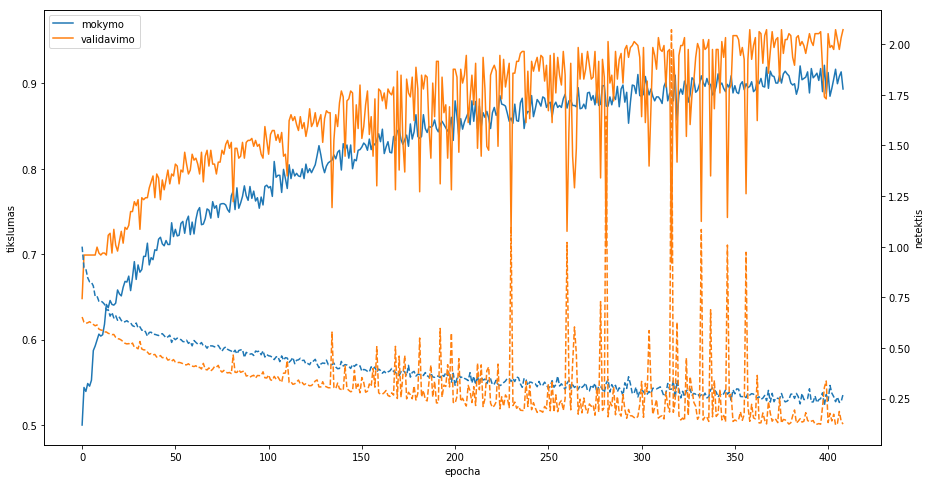

PID: 7.0 TRAIN: 1744 TEST: 101
train: x=(1308, 21, 77, 1) y=(1308, 1)
valid: x=(436, 21, 77, 1) y=(436, 1)
test : x=(101, 21, 77, 1)  y=(101, 1)
Train on 1308 samples, validate on 436 samples
Epoch 1/1000
 - 7s - loss: 0.9277 - acc: 0.5344 - val_loss: 0.6466 - val_acc: 0.6491
Epoch 2/1000
 - 0s - loss: 0.8947 - acc: 0.5413 - val_loss: 0.6324 - val_acc: 0.6743
Epoch 3/1000
 - 0s - loss: 0.8777 - acc: 0.5528 - val_loss: 0.6334 - val_acc: 0.6743
Epoch 4/1000
 - 1s - loss: 0.8123 - acc: 0.5650 - val_loss: 0.6396 - val_acc: 0.6743
Epoch 5/1000
 - 1s - loss: 0.7903 - acc: 0.5872 - val_loss: 0.6500 - val_acc: 0.6743
Epoch 6/1000
 - 1s - loss: 0.7724 - acc: 0.5994 - val_loss: 0.6408 - val_acc: 0.6743
Epoch 7/1000
 - 0s - loss: 0.7725 - acc: 0.5917 - val_loss: 0.6327 - val_acc: 0.6743
Epoch 8/1000
 - 0s - loss: 0.7482 - acc: 0.6131 - val_loss: 0.6274 - val_acc: 0.6743
Epoch 9/1000
 - 0s - loss: 0.7139 - acc: 0.6070 - val_loss: 0.6246 - val_acc: 0.6743
Epoch 10/1000
 - 0s - loss: 0.7362 - acc: 0

 - 1s - loss: 0.3741 - acc: 0.8532 - val_loss: 0.3031 - val_acc: 0.9106
Epoch 95/1000
 - 1s - loss: 0.4018 - acc: 0.8196 - val_loss: 0.2925 - val_acc: 0.9014
Epoch 96/1000
 - 0s - loss: 0.4116 - acc: 0.8242 - val_loss: 0.3196 - val_acc: 0.8807
Epoch 97/1000
 - 0s - loss: 0.3908 - acc: 0.8349 - val_loss: 0.2903 - val_acc: 0.9197
Epoch 98/1000
 - 0s - loss: 0.3747 - acc: 0.8456 - val_loss: 0.2934 - val_acc: 0.9243
Epoch 99/1000
 - 0s - loss: 0.3965 - acc: 0.8341 - val_loss: 0.3035 - val_acc: 0.9060
Epoch 100/1000
 - 0s - loss: 0.3943 - acc: 0.8349 - val_loss: 0.2813 - val_acc: 0.9151
Epoch 101/1000
 - 0s - loss: 0.3865 - acc: 0.8540 - val_loss: 0.2851 - val_acc: 0.9083
Epoch 102/1000
 - 0s - loss: 0.3776 - acc: 0.8410 - val_loss: 0.2804 - val_acc: 0.9220
Epoch 103/1000
 - 0s - loss: 0.3844 - acc: 0.8387 - val_loss: 0.2752 - val_acc: 0.9197
Epoch 104/1000
 - 1s - loss: 0.3897 - acc: 0.8349 - val_loss: 0.2757 - val_acc: 0.9243
Epoch 105/1000
 - 1s - loss: 0.3950 - acc: 0.8203 - val_loss: 0

Epoch 189/1000
 - 1s - loss: 0.2892 - acc: 0.8891 - val_loss: 0.2014 - val_acc: 0.9450
Epoch 190/1000
 - 1s - loss: 0.2741 - acc: 0.8922 - val_loss: 0.2583 - val_acc: 0.9037
Epoch 191/1000
 - 1s - loss: 0.2755 - acc: 0.9052 - val_loss: 0.2520 - val_acc: 0.9266
Epoch 192/1000
 - 0s - loss: 0.3284 - acc: 0.8746 - val_loss: 0.1889 - val_acc: 0.9518
Epoch 193/1000
 - 0s - loss: 0.2915 - acc: 0.8945 - val_loss: 0.1785 - val_acc: 0.9541
Epoch 194/1000
 - 0s - loss: 0.2955 - acc: 0.8769 - val_loss: 0.3058 - val_acc: 0.8991
Epoch 195/1000
 - 0s - loss: 0.2569 - acc: 0.9075 - val_loss: 0.3705 - val_acc: 0.8670
Epoch 196/1000
 - 0s - loss: 0.2953 - acc: 0.8891 - val_loss: 0.1781 - val_acc: 0.9495
Epoch 197/1000
 - 1s - loss: 0.2795 - acc: 0.8914 - val_loss: 0.1844 - val_acc: 0.9518
Epoch 198/1000
 - 1s - loss: 0.2576 - acc: 0.9090 - val_loss: 0.2295 - val_acc: 0.9335
Epoch 199/1000
 - 0s - loss: 0.2630 - acc: 0.9037 - val_loss: 0.2766 - val_acc: 0.8968
Epoch 200/1000
 - 0s - loss: 0.2735 - acc: 

 - 1s - loss: 0.2099 - acc: 0.9251 - val_loss: 0.1336 - val_acc: 0.9633
Epoch 284/1000
 - 1s - loss: 0.2287 - acc: 0.9312 - val_loss: 0.2057 - val_acc: 0.9220
Epoch 285/1000
 - 1s - loss: 0.2533 - acc: 0.9167 - val_loss: 0.1383 - val_acc: 0.9656
Epoch 286/1000
 - 1s - loss: 0.1829 - acc: 0.9358 - val_loss: 0.1509 - val_acc: 0.9610
Epoch 287/1000
 - 1s - loss: 0.2002 - acc: 0.9251 - val_loss: 0.1312 - val_acc: 0.9725
Epoch 288/1000
 - 1s - loss: 0.2124 - acc: 0.9335 - val_loss: 0.1186 - val_acc: 0.9817
Epoch 289/1000
 - 0s - loss: 0.2248 - acc: 0.9274 - val_loss: 0.5478 - val_acc: 0.8372
Epoch 290/1000
 - 0s - loss: 0.2187 - acc: 0.9228 - val_loss: 0.1274 - val_acc: 0.9748
Epoch 291/1000
 - 0s - loss: 0.2781 - acc: 0.9083 - val_loss: 0.3105 - val_acc: 0.8945
Epoch 292/1000
 - 0s - loss: 0.2324 - acc: 0.9174 - val_loss: 0.1192 - val_acc: 0.9839
Epoch 293/1000
 - 0s - loss: 0.1963 - acc: 0.9297 - val_loss: 0.2277 - val_acc: 0.9197
Epoch 294/1000
 - 0s - loss: 0.1961 - acc: 0.9266 - val_lo

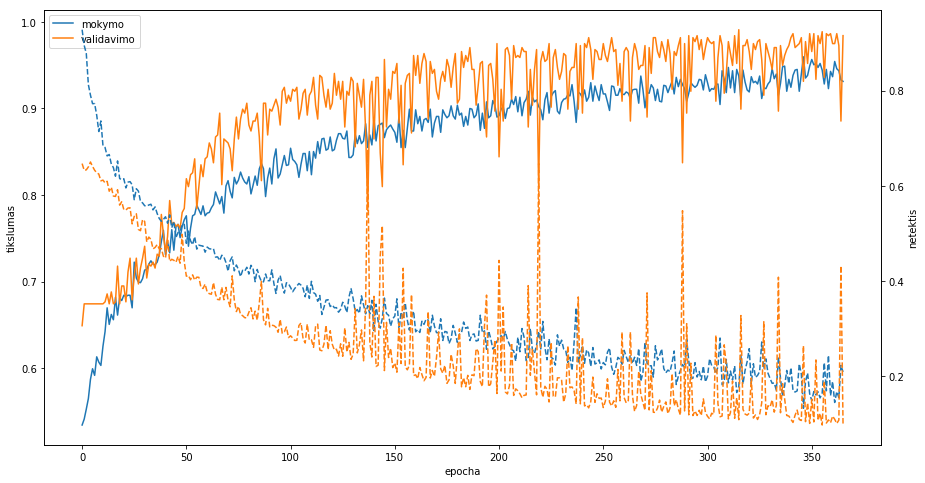

PID: 9.0 TRAIN: 1779 TEST: 66
train: x=(1334, 21, 77, 1) y=(1334, 1)
valid: x=(445, 21, 77, 1) y=(445, 1)
test : x=(66, 21, 77, 1)  y=(66, 1)
Train on 1334 samples, validate on 445 samples
Epoch 1/1000
 - 7s - loss: 0.9137 - acc: 0.5277 - val_loss: 0.6454 - val_acc: 0.6674
Epoch 2/1000
 - 0s - loss: 0.8684 - acc: 0.5645 - val_loss: 0.6641 - val_acc: 0.6674
Epoch 3/1000
 - 0s - loss: 0.8236 - acc: 0.5817 - val_loss: 0.6590 - val_acc: 0.6674
Epoch 4/1000
 - 1s - loss: 0.8014 - acc: 0.5832 - val_loss: 0.6672 - val_acc: 0.6674
Epoch 5/1000
 - 1s - loss: 0.7880 - acc: 0.6012 - val_loss: 0.6608 - val_acc: 0.6674
Epoch 6/1000
 - 1s - loss: 0.7463 - acc: 0.6049 - val_loss: 0.6580 - val_acc: 0.6674
Epoch 7/1000
 - 1s - loss: 0.7353 - acc: 0.6147 - val_loss: 0.6540 - val_acc: 0.6674
Epoch 8/1000
 - 1s - loss: 0.7398 - acc: 0.6184 - val_loss: 0.6497 - val_acc: 0.6674
Epoch 9/1000
 - 1s - loss: 0.6873 - acc: 0.6529 - val_loss: 0.6358 - val_acc: 0.6674
Epoch 10/1000
 - 1s - loss: 0.7050 - acc: 0.62

Epoch 95/1000
 - 1s - loss: 0.4276 - acc: 0.8058 - val_loss: 0.3738 - val_acc: 0.8404
Epoch 96/1000
 - 0s - loss: 0.3859 - acc: 0.8231 - val_loss: 0.3675 - val_acc: 0.8629
Epoch 97/1000
 - 0s - loss: 0.3985 - acc: 0.8148 - val_loss: 0.3916 - val_acc: 0.8292
Epoch 98/1000
 - 0s - loss: 0.3996 - acc: 0.8148 - val_loss: 0.3778 - val_acc: 0.8539
Epoch 99/1000
 - 0s - loss: 0.3807 - acc: 0.8238 - val_loss: 0.3623 - val_acc: 0.8809
Epoch 100/1000
 - 0s - loss: 0.3982 - acc: 0.8103 - val_loss: 0.4043 - val_acc: 0.8427
Epoch 101/1000
 - 0s - loss: 0.3929 - acc: 0.8201 - val_loss: 0.3687 - val_acc: 0.8629
Epoch 102/1000
 - 0s - loss: 0.4062 - acc: 0.8103 - val_loss: 0.3804 - val_acc: 0.8337
Epoch 103/1000
 - 0s - loss: 0.4230 - acc: 0.8103 - val_loss: 0.3681 - val_acc: 0.8629
Epoch 104/1000
 - 0s - loss: 0.3864 - acc: 0.8343 - val_loss: 0.3696 - val_acc: 0.8539
Epoch 105/1000
 - 0s - loss: 0.3923 - acc: 0.8186 - val_loss: 0.3688 - val_acc: 0.8787
Epoch 106/1000
 - 0s - loss: 0.3868 - acc: 0.820

Epoch 190/1000
 - 0s - loss: 0.2835 - acc: 0.8868 - val_loss: 0.3128 - val_acc: 0.8989
Epoch 191/1000
 - 0s - loss: 0.3102 - acc: 0.8763 - val_loss: 0.2719 - val_acc: 0.9213
Epoch 192/1000
 - 0s - loss: 0.3313 - acc: 0.8576 - val_loss: 0.2956 - val_acc: 0.9169
Epoch 193/1000
 - 1s - loss: 0.3091 - acc: 0.8711 - val_loss: 0.3279 - val_acc: 0.8854
Epoch 194/1000
 - 1s - loss: 0.3004 - acc: 0.8703 - val_loss: 0.3236 - val_acc: 0.8966
Epoch 195/1000
 - 1s - loss: 0.3009 - acc: 0.8801 - val_loss: 0.3172 - val_acc: 0.8989
Epoch 196/1000
 - 1s - loss: 0.2997 - acc: 0.8876 - val_loss: 0.2813 - val_acc: 0.9169
Epoch 197/1000
 - 1s - loss: 0.2805 - acc: 0.8906 - val_loss: 0.2643 - val_acc: 0.9236
Epoch 198/1000
 - 1s - loss: 0.2838 - acc: 0.8801 - val_loss: 0.2624 - val_acc: 0.9303
Epoch 199/1000
 - 1s - loss: 0.2929 - acc: 0.8823 - val_loss: 0.2878 - val_acc: 0.9281
Epoch 200/1000
 - 1s - loss: 0.2910 - acc: 0.8801 - val_loss: 0.2548 - val_acc: 0.9303
Epoch 201/1000
 - 1s - loss: 0.2942 - acc: 

 - 0s - loss: 0.2705 - acc: 0.8921 - val_loss: 0.3830 - val_acc: 0.8787
Epoch 285/1000
 - 0s - loss: 0.2645 - acc: 0.8996 - val_loss: 0.4209 - val_acc: 0.8697
Epoch 286/1000
 - 0s - loss: 0.2525 - acc: 0.9040 - val_loss: 0.2171 - val_acc: 0.9483
Epoch 287/1000
 - 0s - loss: 0.2603 - acc: 0.8936 - val_loss: 0.2446 - val_acc: 0.9371
Epoch 288/1000
 - 0s - loss: 0.2546 - acc: 0.8996 - val_loss: 0.2204 - val_acc: 0.9416
Epoch 289/1000
 - 0s - loss: 0.2468 - acc: 0.9010 - val_loss: 0.2101 - val_acc: 0.9461
Epoch 290/1000
 - 0s - loss: 0.2781 - acc: 0.8838 - val_loss: 0.4250 - val_acc: 0.8697
Epoch 291/1000
 - 1s - loss: 0.2336 - acc: 0.9123 - val_loss: 0.4300 - val_acc: 0.8742
Epoch 292/1000
 - 1s - loss: 0.2698 - acc: 0.8831 - val_loss: 0.2233 - val_acc: 0.9348
Epoch 293/1000
 - 1s - loss: 0.2116 - acc: 0.9123 - val_loss: 0.2157 - val_acc: 0.9461
Epoch 294/1000
 - 1s - loss: 0.2447 - acc: 0.9070 - val_loss: 0.2273 - val_acc: 0.9416
Epoch 295/1000
 - 1s - loss: 0.2521 - acc: 0.8988 - val_lo

Epoch 379/1000
 - 1s - loss: 0.2134 - acc: 0.9025 - val_loss: 0.1883 - val_acc: 0.9506
Epoch 380/1000
 - 1s - loss: 0.2325 - acc: 0.9115 - val_loss: 0.2405 - val_acc: 0.9371
Epoch 381/1000
 - 1s - loss: 0.1990 - acc: 0.9220 - val_loss: 0.1893 - val_acc: 0.9528
Epoch 382/1000
 - 1s - loss: 0.2216 - acc: 0.9130 - val_loss: 0.2551 - val_acc: 0.9258
Epoch 383/1000
 - 0s - loss: 0.2198 - acc: 0.9228 - val_loss: 0.4387 - val_acc: 0.8764
Epoch 384/1000
 - 0s - loss: 0.2112 - acc: 0.9093 - val_loss: 0.3241 - val_acc: 0.9056
Epoch 385/1000
 - 0s - loss: 0.2320 - acc: 0.9138 - val_loss: 0.1871 - val_acc: 0.9438
Epoch 386/1000
 - 0s - loss: 0.2299 - acc: 0.9055 - val_loss: 0.1895 - val_acc: 0.9506
Epoch 387/1000
 - 0s - loss: 0.2234 - acc: 0.9130 - val_loss: 0.1859 - val_acc: 0.9551
Epoch 388/1000
 - 1s - loss: 0.1988 - acc: 0.9265 - val_loss: 0.1967 - val_acc: 0.9416
Epoch 389/1000
 - 1s - loss: 0.1996 - acc: 0.9198 - val_loss: 0.1872 - val_acc: 0.9506
Epoch 390/1000
 - 1s - loss: 0.2044 - acc: 

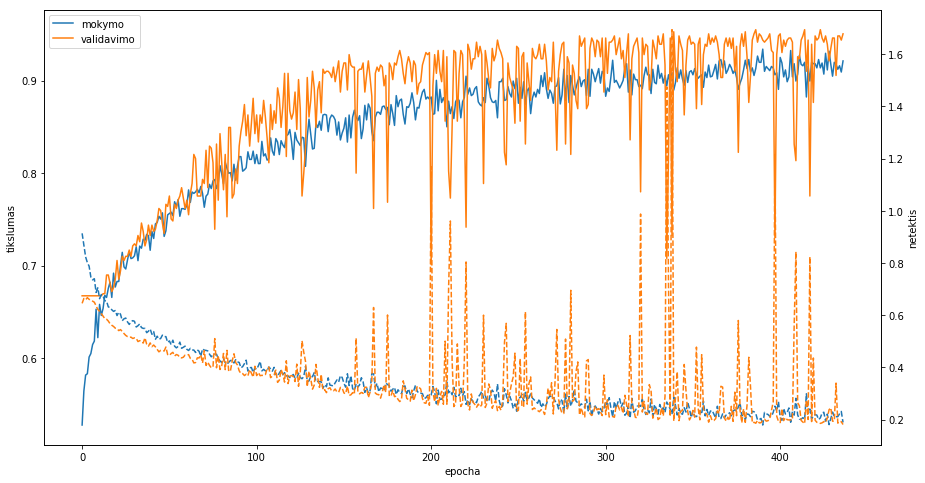

PID: 3.0 TRAIN: 1794 TEST: 51
train: x=(1345, 21, 77, 1) y=(1345, 1)
valid: x=(449, 21, 77, 1) y=(449, 1)
test : x=(51, 21, 77, 1)  y=(51, 1)
Train on 1345 samples, validate on 449 samples
Epoch 1/1000
 - 7s - loss: 0.9273 - acc: 0.5323 - val_loss: 0.6362 - val_acc: 0.6682
Epoch 2/1000
 - 0s - loss: 0.8654 - acc: 0.5606 - val_loss: 0.6457 - val_acc: 0.6726
Epoch 3/1000
 - 0s - loss: 0.8397 - acc: 0.5896 - val_loss: 0.6585 - val_acc: 0.6748
Epoch 4/1000
 - 0s - loss: 0.7927 - acc: 0.6089 - val_loss: 0.6690 - val_acc: 0.6726
Epoch 5/1000
 - 1s - loss: 0.7890 - acc: 0.6045 - val_loss: 0.6817 - val_acc: 0.6726
Epoch 6/1000
 - 1s - loss: 0.7592 - acc: 0.6089 - val_loss: 0.6744 - val_acc: 0.6726
Epoch 7/1000
 - 1s - loss: 0.7515 - acc: 0.6149 - val_loss: 0.6432 - val_acc: 0.6726
Epoch 8/1000
 - 1s - loss: 0.7280 - acc: 0.6186 - val_loss: 0.6506 - val_acc: 0.6726
Epoch 9/1000
 - 1s - loss: 0.7310 - acc: 0.6156 - val_loss: 0.6449 - val_acc: 0.6815
Epoch 10/1000
 - 0s - loss: 0.6908 - acc: 0.63

Epoch 95/1000
 - 1s - loss: 0.5415 - acc: 0.7576 - val_loss: 0.3257 - val_acc: 0.8085
Epoch 96/1000
 - 1s - loss: 0.4386 - acc: 0.7933 - val_loss: 0.3335 - val_acc: 0.8218
Epoch 97/1000
 - 1s - loss: 0.4318 - acc: 0.7829 - val_loss: 0.3144 - val_acc: 0.8374
Epoch 98/1000
 - 1s - loss: 0.4117 - acc: 0.7918 - val_loss: 0.9954 - val_acc: 0.7038
Epoch 99/1000
 - 0s - loss: 0.4632 - acc: 0.7770 - val_loss: 0.3239 - val_acc: 0.8352
Epoch 100/1000
 - 1s - loss: 0.4391 - acc: 0.7747 - val_loss: 0.3153 - val_acc: 0.9042
Epoch 101/1000
 - 1s - loss: 0.4033 - acc: 0.8112 - val_loss: 0.3126 - val_acc: 0.8686
Epoch 102/1000
 - 1s - loss: 0.4084 - acc: 0.8059 - val_loss: 0.3720 - val_acc: 0.8040
Epoch 103/1000
 - 1s - loss: 0.4159 - acc: 0.7985 - val_loss: 0.3152 - val_acc: 0.8686
Epoch 104/1000
 - 1s - loss: 0.4085 - acc: 0.8037 - val_loss: 0.3937 - val_acc: 0.7884
Epoch 105/1000
 - 0s - loss: 0.3956 - acc: 0.8178 - val_loss: 0.3051 - val_acc: 0.8686
Epoch 106/1000
 - 0s - loss: 0.3836 - acc: 0.829

Epoch 190/1000
 - 1s - loss: 0.3124 - acc: 0.8766 - val_loss: 0.3654 - val_acc: 0.8597
Epoch 191/1000
 - 1s - loss: 0.3524 - acc: 0.8439 - val_loss: 0.3125 - val_acc: 0.8886
Epoch 192/1000
 - 1s - loss: 0.3134 - acc: 0.8639 - val_loss: 2.1192 - val_acc: 0.6771
Epoch 193/1000
 - 1s - loss: 0.4386 - acc: 0.8312 - val_loss: 1.3591 - val_acc: 0.7105
Epoch 194/1000
 - 1s - loss: 0.3482 - acc: 0.8565 - val_loss: 0.3574 - val_acc: 0.8374
Epoch 195/1000
 - 0s - loss: 0.3448 - acc: 0.8535 - val_loss: 0.2221 - val_acc: 0.9421
Epoch 196/1000
 - 1s - loss: 0.2947 - acc: 0.8796 - val_loss: 0.5189 - val_acc: 0.7906
Epoch 197/1000
 - 1s - loss: 0.3305 - acc: 0.8625 - val_loss: 4.7698 - val_acc: 0.5791
Epoch 198/1000
 - 1s - loss: 1.5215 - acc: 0.6766 - val_loss: 0.4396 - val_acc: 0.8686
Epoch 199/1000
 - 1s - loss: 0.5142 - acc: 0.7673 - val_loss: 1.4744 - val_acc: 0.6503
Epoch 200/1000
 - 1s - loss: 0.5032 - acc: 0.7710 - val_loss: 0.3083 - val_acc: 0.8218
Epoch 201/1000
 - 1s - loss: 0.4076 - acc: 

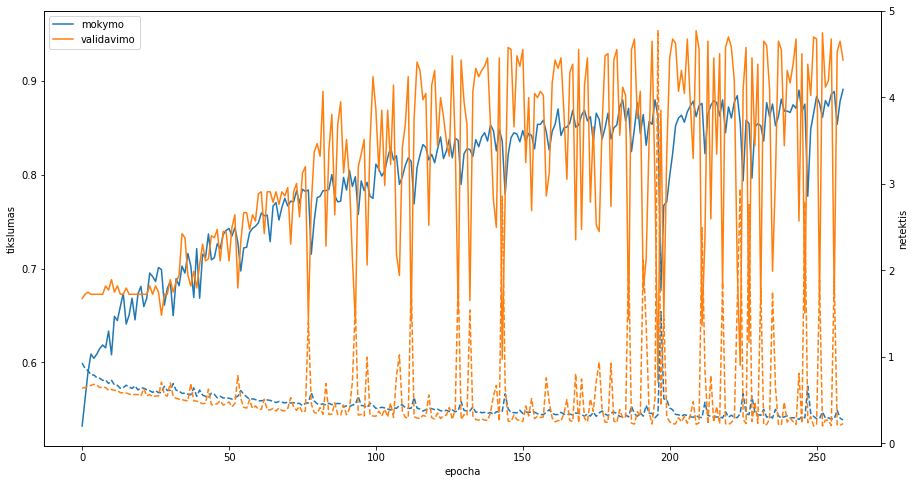

PID: 205.0 TRAIN: 1797 TEST: 48
train: x=(1347, 21, 77, 1) y=(1347, 1)
valid: x=(450, 21, 77, 1) y=(450, 1)
test : x=(48, 21, 77, 1)  y=(48, 1)
Train on 1347 samples, validate on 450 samples
Epoch 1/1000
 - 7s - loss: 0.9567 - acc: 0.5278 - val_loss: 0.6253 - val_acc: 0.7200
Epoch 2/1000
 - 0s - loss: 0.8591 - acc: 0.5546 - val_loss: 0.6027 - val_acc: 0.7044
Epoch 3/1000
 - 0s - loss: 0.8134 - acc: 0.5798 - val_loss: 0.6217 - val_acc: 0.7067
Epoch 4/1000
 - 1s - loss: 0.8080 - acc: 0.5902 - val_loss: 0.6427 - val_acc: 0.7044
Epoch 5/1000
 - 1s - loss: 0.7504 - acc: 0.6333 - val_loss: 0.6493 - val_acc: 0.7044
Epoch 6/1000
 - 1s - loss: 0.7285 - acc: 0.6333 - val_loss: 0.6561 - val_acc: 0.7044
Epoch 7/1000
 - 1s - loss: 0.7201 - acc: 0.6518 - val_loss: 0.6530 - val_acc: 0.7133
Epoch 8/1000
 - 1s - loss: 0.6823 - acc: 0.6793 - val_loss: 0.6305 - val_acc: 0.7044
Epoch 9/1000
 - 1s - loss: 0.6994 - acc: 0.6548 - val_loss: 0.6257 - val_acc: 0.7044
Epoch 10/1000
 - 1s - loss: 0.6737 - acc: 0.

 - 1s - loss: 0.4393 - acc: 0.7988 - val_loss: 0.3894 - val_acc: 0.8556
Epoch 95/1000
 - 1s - loss: 0.4084 - acc: 0.8048 - val_loss: 0.3961 - val_acc: 0.8133
Epoch 96/1000
 - 0s - loss: 0.3949 - acc: 0.8211 - val_loss: 0.5320 - val_acc: 0.7600
Epoch 97/1000
 - 0s - loss: 0.3847 - acc: 0.8151 - val_loss: 0.3803 - val_acc: 0.8644
Epoch 98/1000
 - 1s - loss: 0.4015 - acc: 0.8151 - val_loss: 0.4364 - val_acc: 0.8289
Epoch 99/1000
 - 1s - loss: 0.3895 - acc: 0.8122 - val_loss: 1.0167 - val_acc: 0.6822
Epoch 100/1000
 - 0s - loss: 0.4245 - acc: 0.8010 - val_loss: 0.4053 - val_acc: 0.8022
Epoch 101/1000
 - 0s - loss: 0.3891 - acc: 0.8048 - val_loss: 0.4538 - val_acc: 0.8178
Epoch 102/1000
 - 0s - loss: 0.3790 - acc: 0.8359 - val_loss: 0.3748 - val_acc: 0.8600
Epoch 103/1000
 - 0s - loss: 0.3834 - acc: 0.8211 - val_loss: 0.6169 - val_acc: 0.7489
Epoch 104/1000
 - 0s - loss: 0.3697 - acc: 0.8241 - val_loss: 0.8843 - val_acc: 0.6978
Epoch 105/1000
 - 0s - loss: 0.4221 - acc: 0.8018 - val_loss: 0

Epoch 189/1000
 - 0s - loss: 0.3324 - acc: 0.8634 - val_loss: 0.8950 - val_acc: 0.7511
Epoch 190/1000
 - 1s - loss: 0.3338 - acc: 0.8552 - val_loss: 0.3072 - val_acc: 0.9133
Epoch 191/1000
 - 1s - loss: 0.2845 - acc: 0.8834 - val_loss: 0.4492 - val_acc: 0.8467
Epoch 192/1000
 - 1s - loss: 0.2885 - acc: 0.8745 - val_loss: 0.3554 - val_acc: 0.8778
Epoch 193/1000
 - 1s - loss: 0.3105 - acc: 0.8671 - val_loss: 2.8849 - val_acc: 0.6200
Epoch 194/1000
 - 1s - loss: 0.5132 - acc: 0.8270 - val_loss: 0.2919 - val_acc: 0.9111
Epoch 195/1000
 - 1s - loss: 0.3057 - acc: 0.8649 - val_loss: 0.3992 - val_acc: 0.8467
Epoch 196/1000
 - 1s - loss: 0.2920 - acc: 0.8723 - val_loss: 0.3702 - val_acc: 0.8622
Epoch 197/1000
 - 1s - loss: 0.2798 - acc: 0.8686 - val_loss: 0.6748 - val_acc: 0.7644
Epoch 198/1000
 - 1s - loss: 0.3059 - acc: 0.8589 - val_loss: 0.8108 - val_acc: 0.7667
Epoch 199/1000
 - 1s - loss: 0.2917 - acc: 0.8827 - val_loss: 0.6541 - val_acc: 0.7889
Epoch 200/1000
 - 0s - loss: 0.3007 - acc: 

 - 1s - loss: 0.2349 - acc: 0.9050 - val_loss: 0.6441 - val_acc: 0.8022
Epoch 284/1000
 - 1s - loss: 0.2514 - acc: 0.8990 - val_loss: 0.3389 - val_acc: 0.8756
Epoch 285/1000
 - 1s - loss: 0.2414 - acc: 0.8916 - val_loss: 0.2754 - val_acc: 0.9067
Epoch 286/1000
 - 1s - loss: 0.2555 - acc: 0.9042 - val_loss: 0.2571 - val_acc: 0.9311
Epoch 287/1000
 - 1s - loss: 0.2842 - acc: 0.8872 - val_loss: 0.2255 - val_acc: 0.9400
Epoch 288/1000
 - 1s - loss: 0.2392 - acc: 0.8990 - val_loss: 0.2550 - val_acc: 0.9267
Epoch 289/1000
 - 1s - loss: 0.2315 - acc: 0.9109 - val_loss: 0.2849 - val_acc: 0.9044
Epoch 290/1000
 - 1s - loss: 0.2692 - acc: 0.8849 - val_loss: 0.3929 - val_acc: 0.8578
Epoch 291/1000
 - 0s - loss: 0.2544 - acc: 0.8946 - val_loss: 0.3954 - val_acc: 0.8622
Epoch 292/1000
 - 0s - loss: 0.2424 - acc: 0.9027 - val_loss: 0.2843 - val_acc: 0.9022
Epoch 293/1000
 - 0s - loss: 0.2718 - acc: 0.8879 - val_loss: 0.2650 - val_acc: 0.9178
Epoch 294/1000
 - 0s - loss: 0.2351 - acc: 0.9050 - val_lo

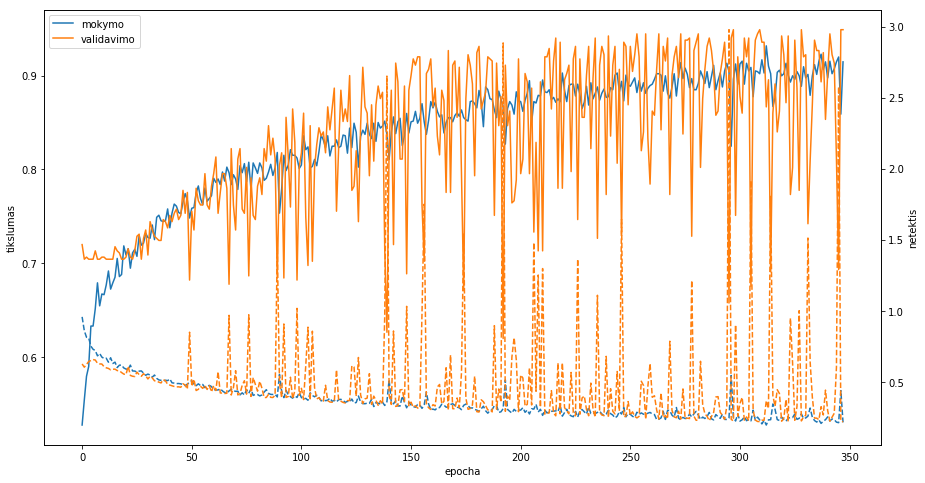

PID: 8.0 TRAIN: 1798 TEST: 47
train: x=(1348, 21, 77, 1) y=(1348, 1)
valid: x=(450, 21, 77, 1) y=(450, 1)
test : x=(47, 21, 77, 1)  y=(47, 1)
Train on 1348 samples, validate on 450 samples
Epoch 1/1000
 - 7s - loss: 0.9739 - acc: 0.4978 - val_loss: 0.6601 - val_acc: 0.6733
Epoch 2/1000
 - 0s - loss: 0.8643 - acc: 0.5467 - val_loss: 0.6532 - val_acc: 0.6778
Epoch 3/1000
 - 0s - loss: 0.8408 - acc: 0.5490 - val_loss: 0.6519 - val_acc: 0.6800
Epoch 4/1000
 - 1s - loss: 0.7647 - acc: 0.5994 - val_loss: 0.6542 - val_acc: 0.6800
Epoch 5/1000
 - 1s - loss: 0.7204 - acc: 0.6194 - val_loss: 0.6557 - val_acc: 0.6778
Epoch 6/1000
 - 1s - loss: 0.7442 - acc: 0.6128 - val_loss: 0.6485 - val_acc: 0.6778
Epoch 7/1000
 - 1s - loss: 0.7316 - acc: 0.6358 - val_loss: 0.6497 - val_acc: 0.6778
Epoch 8/1000
 - 1s - loss: 0.7344 - acc: 0.6187 - val_loss: 0.6368 - val_acc: 0.6778
Epoch 9/1000
 - 1s - loss: 0.7058 - acc: 0.6306 - val_loss: 0.6388 - val_acc: 0.6778
Epoch 10/1000
 - 1s - loss: 0.6953 - acc: 0.63

Epoch 95/1000
 - 0s - loss: 0.4371 - acc: 0.7826 - val_loss: 0.3789 - val_acc: 0.8600
Epoch 96/1000
 - 0s - loss: 0.4250 - acc: 0.7975 - val_loss: 0.4091 - val_acc: 0.8244
Epoch 97/1000
 - 1s - loss: 0.4391 - acc: 0.7938 - val_loss: 1.3446 - val_acc: 0.6578
Epoch 98/1000
 - 1s - loss: 0.4560 - acc: 0.7856 - val_loss: 0.4776 - val_acc: 0.7689
Epoch 99/1000
 - 1s - loss: 0.4241 - acc: 0.7975 - val_loss: 0.3700 - val_acc: 0.8511
Epoch 100/1000
 - 1s - loss: 0.4123 - acc: 0.8116 - val_loss: 0.4484 - val_acc: 0.8111
Epoch 101/1000
 - 1s - loss: 0.4311 - acc: 0.8004 - val_loss: 0.5334 - val_acc: 0.7578
Epoch 102/1000
 - 1s - loss: 0.4039 - acc: 0.8042 - val_loss: 0.4073 - val_acc: 0.8156
Epoch 103/1000
 - 1s - loss: 0.4192 - acc: 0.8056 - val_loss: 0.3608 - val_acc: 0.8622
Epoch 104/1000
 - 1s - loss: 0.4280 - acc: 0.8004 - val_loss: 0.3779 - val_acc: 0.8489
Epoch 105/1000
 - 0s - loss: 0.4231 - acc: 0.8093 - val_loss: 0.4023 - val_acc: 0.8556
Epoch 106/1000
 - 0s - loss: 0.4021 - acc: 0.811

Epoch 190/1000
 - 1s - loss: 0.3236 - acc: 0.8717 - val_loss: 0.2815 - val_acc: 0.8978
Epoch 191/1000
 - 1s - loss: 0.3145 - acc: 0.8620 - val_loss: 0.2691 - val_acc: 0.9044
Epoch 192/1000
 - 0s - loss: 0.3228 - acc: 0.8539 - val_loss: 0.2603 - val_acc: 0.9044
Epoch 193/1000
 - 0s - loss: 0.3150 - acc: 0.8665 - val_loss: 0.2861 - val_acc: 0.9000
Epoch 194/1000
 - 1s - loss: 0.3141 - acc: 0.8672 - val_loss: 0.4683 - val_acc: 0.8022
Epoch 195/1000
 - 1s - loss: 0.3145 - acc: 0.8813 - val_loss: 0.4520 - val_acc: 0.8244
Epoch 196/1000
 - 1s - loss: 0.3201 - acc: 0.8731 - val_loss: 0.4600 - val_acc: 0.8244
Epoch 197/1000
 - 0s - loss: 0.3120 - acc: 0.8820 - val_loss: 0.2794 - val_acc: 0.8889
Epoch 198/1000
 - 0s - loss: 0.2909 - acc: 0.8902 - val_loss: 0.4780 - val_acc: 0.8000
Epoch 199/1000
 - 1s - loss: 0.3426 - acc: 0.8546 - val_loss: 0.4776 - val_acc: 0.8133
Epoch 200/1000
 - 1s - loss: 0.3182 - acc: 0.8724 - val_loss: 0.3179 - val_acc: 0.8844
Epoch 201/1000
 - 1s - loss: 0.2915 - acc: 

 - 0s - loss: 0.2921 - acc: 0.8872 - val_loss: 0.2663 - val_acc: 0.8978
Restoring model weights from the end of the best epoch
Epoch 00284: early stopping
47/47 [==============================] - 0s 107us/step
Testing:
loss = 0.0022192215596504032
acc = 1.0


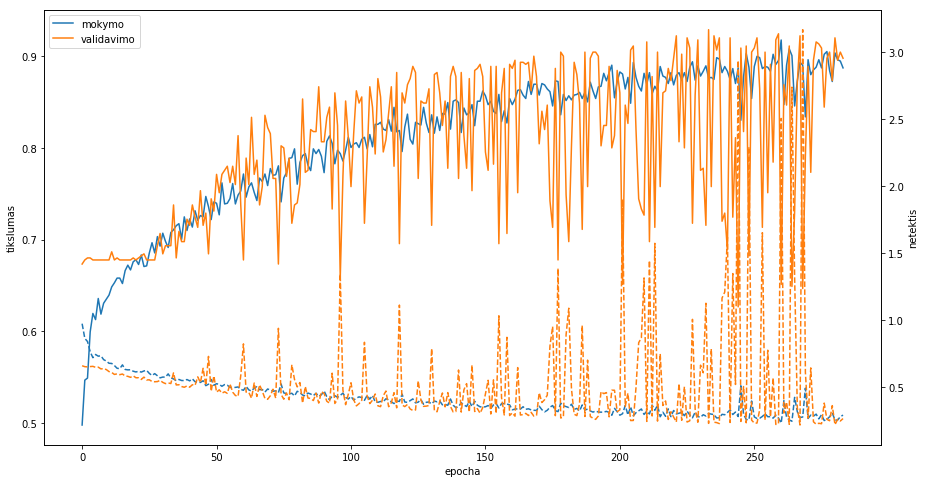

PID: 219.0 TRAIN: 1801 TEST: 44
train: x=(1350, 21, 77, 1) y=(1350, 1)
valid: x=(451, 21, 77, 1) y=(451, 1)
test : x=(44, 21, 77, 1)  y=(44, 1)
Train on 1350 samples, validate on 451 samples
Epoch 1/1000
 - 8s - loss: 0.9574 - acc: 0.5059 - val_loss: 0.6182 - val_acc: 0.7051
Epoch 2/1000
 - 0s - loss: 0.8210 - acc: 0.5674 - val_loss: 0.6056 - val_acc: 0.7162
Epoch 3/1000
 - 0s - loss: 0.7533 - acc: 0.5978 - val_loss: 0.6204 - val_acc: 0.7162
Epoch 4/1000
 - 1s - loss: 0.7454 - acc: 0.6193 - val_loss: 0.6290 - val_acc: 0.7162
Epoch 5/1000
 - 1s - loss: 0.6950 - acc: 0.6385 - val_loss: 0.6220 - val_acc: 0.7162
Epoch 6/1000
 - 0s - loss: 0.7204 - acc: 0.6304 - val_loss: 0.6147 - val_acc: 0.7162
Epoch 7/1000
 - 1s - loss: 0.6894 - acc: 0.6593 - val_loss: 0.6025 - val_acc: 0.7162
Epoch 8/1000
 - 1s - loss: 0.7097 - acc: 0.6526 - val_loss: 0.5861 - val_acc: 0.7162
Epoch 9/1000
 - 0s - loss: 0.6679 - acc: 0.6556 - val_loss: 0.5843 - val_acc: 0.7162
Epoch 10/1000
 - 0s - loss: 0.6658 - acc: 0.

 - 0s - loss: 0.4334 - acc: 0.8059 - val_loss: 0.3187 - val_acc: 0.9024
Epoch 95/1000
 - 0s - loss: 0.3957 - acc: 0.8296 - val_loss: 0.3139 - val_acc: 0.9002
Epoch 96/1000
 - 0s - loss: 0.4149 - acc: 0.8200 - val_loss: 0.3623 - val_acc: 0.8603
Epoch 97/1000
 - 0s - loss: 0.3911 - acc: 0.8259 - val_loss: 0.4206 - val_acc: 0.8115
Epoch 98/1000
 - 0s - loss: 0.4160 - acc: 0.8178 - val_loss: 0.3186 - val_acc: 0.9002
Epoch 99/1000
 - 0s - loss: 0.3953 - acc: 0.8385 - val_loss: 0.3397 - val_acc: 0.8847
Epoch 100/1000
 - 0s - loss: 0.4007 - acc: 0.8289 - val_loss: 0.4093 - val_acc: 0.8271
Epoch 101/1000
 - 1s - loss: 0.4086 - acc: 0.8296 - val_loss: 0.8462 - val_acc: 0.7206
Epoch 102/1000
 - 1s - loss: 0.4370 - acc: 0.8104 - val_loss: 0.3178 - val_acc: 0.8869
Epoch 103/1000
 - 1s - loss: 0.3988 - acc: 0.8207 - val_loss: 0.3025 - val_acc: 0.9268
Epoch 104/1000
 - 1s - loss: 0.4206 - acc: 0.8207 - val_loss: 0.3314 - val_acc: 0.8492
Epoch 105/1000
 - 1s - loss: 0.4004 - acc: 0.8267 - val_loss: 0

Epoch 189/1000
 - 0s - loss: 0.2995 - acc: 0.8852 - val_loss: 0.2177 - val_acc: 0.9490
Epoch 190/1000
 - 1s - loss: 0.3703 - acc: 0.8393 - val_loss: 0.7659 - val_acc: 0.7517
Epoch 191/1000
 - 1s - loss: 0.3367 - acc: 0.8593 - val_loss: 0.2087 - val_acc: 0.9424
Epoch 192/1000
 - 0s - loss: 0.3151 - acc: 0.8756 - val_loss: 0.2080 - val_acc: 0.9557
Epoch 193/1000
 - 0s - loss: 0.3301 - acc: 0.8681 - val_loss: 0.3567 - val_acc: 0.8470
Epoch 194/1000
 - 0s - loss: 0.3046 - acc: 0.8852 - val_loss: 0.2309 - val_acc: 0.9401
Epoch 195/1000
 - 0s - loss: 0.3155 - acc: 0.8667 - val_loss: 0.3482 - val_acc: 0.8537
Epoch 196/1000
 - 0s - loss: 0.2879 - acc: 0.8815 - val_loss: 0.3364 - val_acc: 0.8647
Epoch 197/1000
 - 0s - loss: 0.2782 - acc: 0.8911 - val_loss: 1.4025 - val_acc: 0.7184
Epoch 198/1000
 - 0s - loss: 0.3473 - acc: 0.8659 - val_loss: 0.8058 - val_acc: 0.7627
Epoch 199/1000
 - 1s - loss: 0.3294 - acc: 0.8570 - val_loss: 0.5368 - val_acc: 0.7916
Epoch 200/1000
 - 1s - loss: 0.2953 - acc: 

 - 1s - loss: 0.2572 - acc: 0.9007 - val_loss: 0.1519 - val_acc: 0.9712
Epoch 284/1000
 - 1s - loss: 0.2470 - acc: 0.8978 - val_loss: 0.9998 - val_acc: 0.7650
Epoch 285/1000
 - 1s - loss: 0.3245 - acc: 0.8874 - val_loss: 0.2842 - val_acc: 0.8847
Epoch 286/1000
 - 1s - loss: 0.2503 - acc: 0.9022 - val_loss: 0.2389 - val_acc: 0.9202
Epoch 287/1000
 - 1s - loss: 0.2270 - acc: 0.9104 - val_loss: 0.1550 - val_acc: 0.9690
Epoch 288/1000
 - 0s - loss: 0.2209 - acc: 0.9193 - val_loss: 0.3261 - val_acc: 0.8692
Epoch 289/1000
 - 1s - loss: 0.2782 - acc: 0.8859 - val_loss: 0.1973 - val_acc: 0.9335
Epoch 290/1000
 - 1s - loss: 0.2581 - acc: 0.8993 - val_loss: 0.1549 - val_acc: 0.9667
Epoch 291/1000
 - 1s - loss: 0.2276 - acc: 0.9141 - val_loss: 0.1520 - val_acc: 0.9734
Epoch 292/1000
 - 1s - loss: 0.2171 - acc: 0.9185 - val_loss: 0.1484 - val_acc: 0.9734
Epoch 293/1000
 - 0s - loss: 0.2249 - acc: 0.9163 - val_loss: 0.3266 - val_acc: 0.8692
Epoch 294/1000
 - 0s - loss: 0.2190 - acc: 0.9163 - val_lo

Epoch 378/1000
 - 1s - loss: 0.2037 - acc: 0.9237 - val_loss: 0.1457 - val_acc: 0.9645
Epoch 379/1000
 - 1s - loss: 0.1999 - acc: 0.9230 - val_loss: 0.1338 - val_acc: 0.9712
Epoch 380/1000
 - 0s - loss: 0.2394 - acc: 0.9067 - val_loss: 0.1625 - val_acc: 0.9579
Epoch 381/1000
 - 0s - loss: 0.2063 - acc: 0.9207 - val_loss: 0.3572 - val_acc: 0.8647
Epoch 382/1000
 - 0s - loss: 0.2122 - acc: 0.9207 - val_loss: 0.4302 - val_acc: 0.8359
Epoch 383/1000
 - 0s - loss: 0.1891 - acc: 0.9304 - val_loss: 0.1510 - val_acc: 0.9579
Epoch 384/1000
 - 0s - loss: 0.2065 - acc: 0.9244 - val_loss: 0.1295 - val_acc: 0.9734
Epoch 385/1000
 - 1s - loss: 0.1973 - acc: 0.9326 - val_loss: 0.7867 - val_acc: 0.7894
Epoch 386/1000
 - 1s - loss: 0.2087 - acc: 0.9259 - val_loss: 0.9273 - val_acc: 0.7827
Epoch 387/1000
 - 1s - loss: 0.2614 - acc: 0.9052 - val_loss: 0.2015 - val_acc: 0.9357
Epoch 388/1000
 - 1s - loss: 0.2140 - acc: 0.9148 - val_loss: 0.2194 - val_acc: 0.9157
Epoch 389/1000
 - 0s - loss: 0.2166 - acc: 

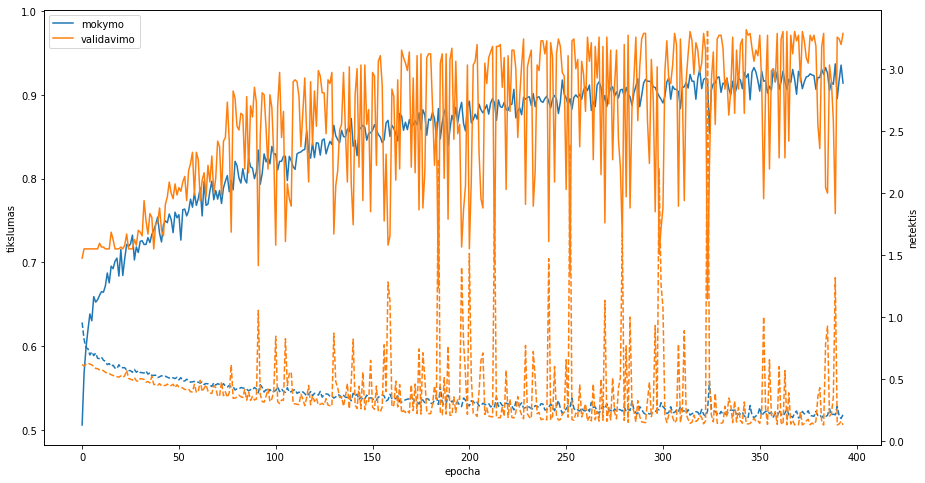

PID: 12.0 TRAIN: 1814 TEST: 31
train: x=(1360, 21, 77, 1) y=(1360, 1)
valid: x=(454, 21, 77, 1) y=(454, 1)
test : x=(31, 21, 77, 1)  y=(31, 1)
Train on 1360 samples, validate on 454 samples
Epoch 1/1000
 - 7s - loss: 0.9481 - acc: 0.5346 - val_loss: 0.6386 - val_acc: 0.6850
Epoch 2/1000
 - 0s - loss: 0.9095 - acc: 0.5397 - val_loss: 0.6231 - val_acc: 0.7026
Epoch 3/1000
 - 0s - loss: 0.8498 - acc: 0.5676 - val_loss: 0.6285 - val_acc: 0.7026
Epoch 4/1000
 - 0s - loss: 0.8144 - acc: 0.5824 - val_loss: 0.6238 - val_acc: 0.7026
Epoch 5/1000
 - 0s - loss: 0.7692 - acc: 0.6074 - val_loss: 0.6171 - val_acc: 0.7026
Epoch 6/1000
 - 0s - loss: 0.7575 - acc: 0.6074 - val_loss: 0.6165 - val_acc: 0.7026
Epoch 7/1000
 - 0s - loss: 0.7461 - acc: 0.6051 - val_loss: 0.6120 - val_acc: 0.7026
Epoch 8/1000
 - 0s - loss: 0.7188 - acc: 0.6162 - val_loss: 0.6052 - val_acc: 0.7026
Epoch 9/1000
 - 0s - loss: 0.7071 - acc: 0.6294 - val_loss: 0.6061 - val_acc: 0.7026
Epoch 10/1000
 - 0s - loss: 0.7080 - acc: 0.6

 - 0s - loss: 0.4002 - acc: 0.8301 - val_loss: 0.3017 - val_acc: 0.9185
Epoch 95/1000
 - 0s - loss: 0.4062 - acc: 0.8199 - val_loss: 0.3045 - val_acc: 0.9207
Epoch 96/1000
 - 0s - loss: 0.3751 - acc: 0.8493 - val_loss: 0.3419 - val_acc: 0.8767
Epoch 97/1000
 - 0s - loss: 0.4162 - acc: 0.8132 - val_loss: 0.3678 - val_acc: 0.8524
Epoch 98/1000
 - 1s - loss: 0.3911 - acc: 0.8287 - val_loss: 0.2954 - val_acc: 0.9295
Epoch 99/1000
 - 1s - loss: 0.3921 - acc: 0.8316 - val_loss: 0.3070 - val_acc: 0.8943
Epoch 100/1000
 - 1s - loss: 0.3801 - acc: 0.8434 - val_loss: 0.2913 - val_acc: 0.9229
Epoch 101/1000
 - 1s - loss: 0.3809 - acc: 0.8397 - val_loss: 0.5695 - val_acc: 0.7533
Epoch 102/1000
 - 1s - loss: 0.3906 - acc: 0.8257 - val_loss: 0.4782 - val_acc: 0.7974
Epoch 103/1000
 - 0s - loss: 0.3661 - acc: 0.8434 - val_loss: 0.5333 - val_acc: 0.7621
Epoch 104/1000
 - 1s - loss: 0.3843 - acc: 0.8309 - val_loss: 0.2910 - val_acc: 0.9119
Epoch 105/1000
 - 0s - loss: 0.3965 - acc: 0.8250 - val_loss: 0

Epoch 189/1000
 - 0s - loss: 0.3031 - acc: 0.8794 - val_loss: 0.8929 - val_acc: 0.7533
Epoch 190/1000
 - 0s - loss: 0.3264 - acc: 0.8706 - val_loss: 0.2155 - val_acc: 0.9405
Epoch 191/1000
 - 0s - loss: 0.2932 - acc: 0.8838 - val_loss: 0.2104 - val_acc: 0.9361
Epoch 192/1000
 - 0s - loss: 0.2804 - acc: 0.8853 - val_loss: 0.2593 - val_acc: 0.9163
Epoch 193/1000
 - 1s - loss: 0.2987 - acc: 0.8860 - val_loss: 0.2233 - val_acc: 0.9339
Epoch 194/1000
 - 1s - loss: 0.2743 - acc: 0.8919 - val_loss: 0.2789 - val_acc: 0.9053
Epoch 195/1000
 - 1s - loss: 0.2968 - acc: 0.8838 - val_loss: 0.2886 - val_acc: 0.9009
Epoch 196/1000
 - 0s - loss: 0.2814 - acc: 0.8985 - val_loss: 0.3546 - val_acc: 0.8590
Epoch 197/1000
 - 0s - loss: 0.3305 - acc: 0.8515 - val_loss: 0.2419 - val_acc: 0.9273
Epoch 198/1000
 - 0s - loss: 0.2990 - acc: 0.8721 - val_loss: 0.1982 - val_acc: 0.9493
Epoch 199/1000
 - 0s - loss: 0.2845 - acc: 0.8831 - val_loss: 0.4230 - val_acc: 0.8414
Epoch 200/1000
 - 0s - loss: 0.3333 - acc: 

 - 1s - loss: 0.2750 - acc: 0.8897 - val_loss: 0.1769 - val_acc: 0.9471
Epoch 284/1000
 - 1s - loss: 0.2945 - acc: 0.8846 - val_loss: 0.1773 - val_acc: 0.9493
Epoch 285/1000
 - 1s - loss: 0.2372 - acc: 0.9081 - val_loss: 0.3852 - val_acc: 0.8767
Epoch 286/1000
 - 1s - loss: 0.2824 - acc: 0.8809 - val_loss: 0.2772 - val_acc: 0.9053
Epoch 287/1000
 - 0s - loss: 0.2930 - acc: 0.8794 - val_loss: 0.1695 - val_acc: 0.9515
Epoch 288/1000
 - 0s - loss: 0.2280 - acc: 0.9096 - val_loss: 0.1731 - val_acc: 0.9537
Epoch 289/1000
 - 1s - loss: 0.2378 - acc: 0.9000 - val_loss: 0.1903 - val_acc: 0.9449
Epoch 290/1000
 - 1s - loss: 0.2384 - acc: 0.9132 - val_loss: 0.1692 - val_acc: 0.9493
Epoch 291/1000
 - 1s - loss: 0.2417 - acc: 0.9088 - val_loss: 0.1784 - val_acc: 0.9427
Epoch 292/1000
 - 1s - loss: 0.2330 - acc: 0.9074 - val_loss: 0.2408 - val_acc: 0.9251
Epoch 293/1000
 - 1s - loss: 0.2495 - acc: 0.9059 - val_loss: 0.1640 - val_acc: 0.9559
Epoch 294/1000
 - 1s - loss: 0.2696 - acc: 0.9015 - val_lo

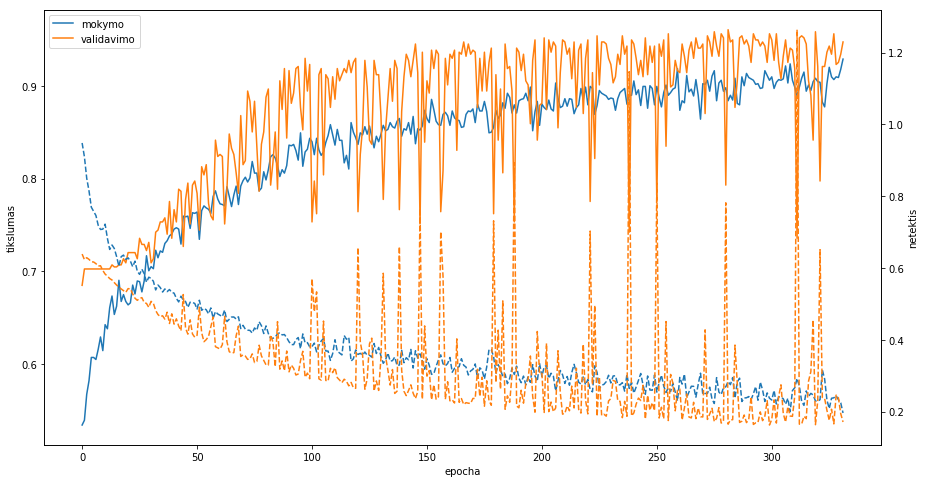

PID: 209.0 TRAIN: 1826 TEST: 19
train: x=(1369, 21, 77, 1) y=(1369, 1)
valid: x=(457, 21, 77, 1) y=(457, 1)
test : x=(19, 21, 77, 1)  y=(19, 1)
Train on 1369 samples, validate on 457 samples
Epoch 1/1000
 - 8s - loss: 0.9964 - acc: 0.5142 - val_loss: 0.6647 - val_acc: 0.6127
Epoch 2/1000
 - 0s - loss: 0.8980 - acc: 0.5478 - val_loss: 0.6437 - val_acc: 0.6805
Epoch 3/1000
 - 0s - loss: 0.8566 - acc: 0.5522 - val_loss: 0.6751 - val_acc: 0.6805
Epoch 4/1000
 - 0s - loss: 0.8326 - acc: 0.5873 - val_loss: 0.6973 - val_acc: 0.6805
Epoch 5/1000
 - 1s - loss: 0.7783 - acc: 0.6231 - val_loss: 0.7096 - val_acc: 0.6805
Epoch 6/1000
 - 1s - loss: 0.7899 - acc: 0.6187 - val_loss: 0.7061 - val_acc: 0.6805
Epoch 7/1000
 - 1s - loss: 0.7363 - acc: 0.6486 - val_loss: 0.7059 - val_acc: 0.6805
Epoch 8/1000
 - 1s - loss: 0.7321 - acc: 0.6289 - val_loss: 0.7014 - val_acc: 0.6805
Epoch 9/1000
 - 0s - loss: 0.7379 - acc: 0.6362 - val_loss: 0.6938 - val_acc: 0.6805
Epoch 10/1000
 - 0s - loss: 0.7015 - acc: 0.

 - 0s - loss: 0.4297 - acc: 0.7962 - val_loss: 0.3847 - val_acc: 0.8184
Epoch 95/1000
 - 0s - loss: 0.4158 - acc: 0.8108 - val_loss: 0.3862 - val_acc: 0.8293
Epoch 96/1000
 - 0s - loss: 0.4121 - acc: 0.8020 - val_loss: 0.4481 - val_acc: 0.8118
Epoch 97/1000
 - 0s - loss: 0.3941 - acc: 0.8167 - val_loss: 0.3796 - val_acc: 0.8118
Epoch 98/1000
 - 1s - loss: 0.4138 - acc: 0.8123 - val_loss: 0.3808 - val_acc: 0.8140
Epoch 99/1000
 - 1s - loss: 0.4138 - acc: 0.8115 - val_loss: 0.3706 - val_acc: 0.8293
Epoch 100/1000
 - 1s - loss: 0.3901 - acc: 0.8254 - val_loss: 0.3725 - val_acc: 0.8468
Epoch 101/1000
 - 1s - loss: 0.4078 - acc: 0.7999 - val_loss: 0.3753 - val_acc: 0.8468
Epoch 102/1000
 - 0s - loss: 0.4089 - acc: 0.8225 - val_loss: 0.3817 - val_acc: 0.8228
Epoch 103/1000
 - 0s - loss: 0.3943 - acc: 0.8137 - val_loss: 0.4005 - val_acc: 0.8337
Epoch 104/1000
 - 0s - loss: 0.3903 - acc: 0.8247 - val_loss: 0.3639 - val_acc: 0.8621
Epoch 105/1000
 - 0s - loss: 0.3934 - acc: 0.8093 - val_loss: 0

Epoch 189/1000
 - 0s - loss: 0.3202 - acc: 0.8700 - val_loss: 0.2961 - val_acc: 0.8928
Epoch 190/1000
 - 0s - loss: 0.3376 - acc: 0.8590 - val_loss: 0.3085 - val_acc: 0.8818
Epoch 191/1000
 - 0s - loss: 0.3379 - acc: 0.8451 - val_loss: 0.2668 - val_acc: 0.9103
Epoch 192/1000
 - 0s - loss: 0.3191 - acc: 0.8598 - val_loss: 0.2911 - val_acc: 0.8950
Epoch 193/1000
 - 1s - loss: 0.2944 - acc: 0.8817 - val_loss: 0.3121 - val_acc: 0.8950
Epoch 194/1000
 - 1s - loss: 0.3150 - acc: 0.8656 - val_loss: 0.2739 - val_acc: 0.9015
Epoch 195/1000
 - 1s - loss: 0.3025 - acc: 0.8744 - val_loss: 0.3073 - val_acc: 0.9015
Epoch 196/1000
 - 1s - loss: 0.3148 - acc: 0.8722 - val_loss: 0.5637 - val_acc: 0.7856
Epoch 197/1000
 - 1s - loss: 0.2957 - acc: 0.8897 - val_loss: 0.2530 - val_acc: 0.9103
Epoch 198/1000
 - 1s - loss: 0.3276 - acc: 0.8671 - val_loss: 0.2683 - val_acc: 0.9059
Epoch 199/1000
 - 1s - loss: 0.3121 - acc: 0.8795 - val_loss: 0.2757 - val_acc: 0.8928
Epoch 200/1000
 - 1s - loss: 0.2885 - acc: 

 - 1s - loss: 0.2576 - acc: 0.9014 - val_loss: 0.2399 - val_acc: 0.9212
Epoch 284/1000
 - 1s - loss: 0.2726 - acc: 0.8963 - val_loss: 0.2182 - val_acc: 0.9234
Epoch 285/1000
 - 1s - loss: 0.2447 - acc: 0.9036 - val_loss: 0.2907 - val_acc: 0.8993
Epoch 286/1000
 - 1s - loss: 0.2509 - acc: 0.9058 - val_loss: 0.2169 - val_acc: 0.9125
Epoch 287/1000
 - 1s - loss: 0.2542 - acc: 0.8977 - val_loss: 0.2368 - val_acc: 0.9168
Epoch 288/1000
 - 1s - loss: 0.2818 - acc: 0.8809 - val_loss: 0.1933 - val_acc: 0.9387
Epoch 289/1000
 - 1s - loss: 0.2772 - acc: 0.8948 - val_loss: 0.3234 - val_acc: 0.8709
Epoch 290/1000
 - 1s - loss: 0.2576 - acc: 0.8963 - val_loss: 0.2028 - val_acc: 0.9344
Epoch 291/1000
 - 1s - loss: 0.2778 - acc: 0.8926 - val_loss: 0.2123 - val_acc: 0.9234
Epoch 292/1000
 - 0s - loss: 0.2459 - acc: 0.9021 - val_loss: 0.2003 - val_acc: 0.9387
Epoch 293/1000
 - 0s - loss: 0.2586 - acc: 0.8963 - val_loss: 0.1891 - val_acc: 0.9431
Epoch 294/1000
 - 1s - loss: 0.3081 - acc: 0.8758 - val_lo

Epoch 378/1000
 - 1s - loss: 0.2475 - acc: 0.9123 - val_loss: 0.2003 - val_acc: 0.9365
Epoch 379/1000
 - 1s - loss: 0.2644 - acc: 0.9028 - val_loss: 0.1973 - val_acc: 0.9365
Epoch 380/1000
 - 1s - loss: 0.2080 - acc: 0.9211 - val_loss: 0.1799 - val_acc: 0.9409
Epoch 381/1000
 - 0s - loss: 0.2228 - acc: 0.9211 - val_loss: 0.1648 - val_acc: 0.9497
Epoch 382/1000
 - 0s - loss: 0.2262 - acc: 0.9050 - val_loss: 0.1649 - val_acc: 0.9519
Epoch 383/1000
 - 0s - loss: 0.2515 - acc: 0.8941 - val_loss: 0.1751 - val_acc: 0.9475
Epoch 384/1000
 - 1s - loss: 0.2178 - acc: 0.9196 - val_loss: 0.2192 - val_acc: 0.9190
Epoch 385/1000
 - 0s - loss: 0.2307 - acc: 0.9123 - val_loss: 0.1697 - val_acc: 0.9497
Epoch 386/1000
 - 1s - loss: 0.2451 - acc: 0.8992 - val_loss: 0.2004 - val_acc: 0.9212
Epoch 387/1000
 - 1s - loss: 0.2215 - acc: 0.9211 - val_loss: 0.1783 - val_acc: 0.9431
Epoch 388/1000
 - 1s - loss: 0.2320 - acc: 0.9116 - val_loss: 0.4400 - val_acc: 0.8621
Epoch 389/1000
 - 1s - loss: 0.2660 - acc: 

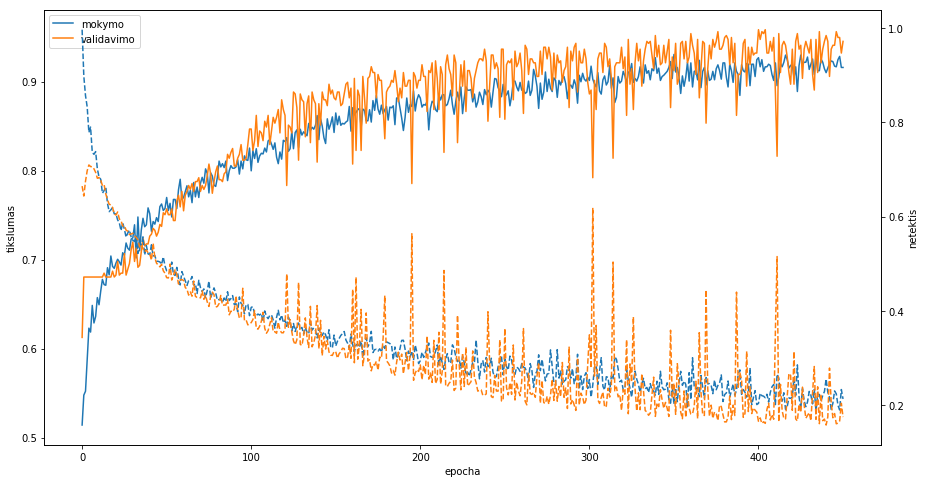

PID: 2.0 TRAIN: 1838 TEST: 7
train: x=(1378, 21, 77, 1) y=(1378, 1)
valid: x=(460, 21, 77, 1) y=(460, 1)
test : x=(7, 21, 77, 1)  y=(7, 1)
Train on 1378 samples, validate on 460 samples
Epoch 1/1000
 - 8s - loss: 0.9473 - acc: 0.5196 - val_loss: 0.6265 - val_acc: 0.7043
Epoch 2/1000
 - 0s - loss: 0.8601 - acc: 0.5508 - val_loss: 0.6228 - val_acc: 0.6935
Epoch 3/1000
 - 0s - loss: 0.8295 - acc: 0.5689 - val_loss: 0.6310 - val_acc: 0.6935
Epoch 4/1000
 - 0s - loss: 0.7591 - acc: 0.5994 - val_loss: 0.6305 - val_acc: 0.6935
Epoch 5/1000
 - 0s - loss: 0.7767 - acc: 0.6016 - val_loss: 0.6460 - val_acc: 0.6935
Epoch 6/1000
 - 0s - loss: 0.7606 - acc: 0.6110 - val_loss: 0.6345 - val_acc: 0.6935
Epoch 7/1000
 - 1s - loss: 0.7697 - acc: 0.6241 - val_loss: 0.6184 - val_acc: 0.6935
Epoch 8/1000
 - 1s - loss: 0.7265 - acc: 0.6205 - val_loss: 0.6224 - val_acc: 0.6935
Epoch 9/1000
 - 1s - loss: 0.7256 - acc: 0.6248 - val_loss: 0.6032 - val_acc: 0.6935
Epoch 10/1000
 - 0s - loss: 0.6835 - acc: 0.6546 

Epoch 95/1000
 - 1s - loss: 0.4185 - acc: 0.7925 - val_loss: 0.3246 - val_acc: 0.8848
Epoch 96/1000
 - 1s - loss: 0.4040 - acc: 0.8084 - val_loss: 0.3229 - val_acc: 0.8587
Epoch 97/1000
 - 1s - loss: 0.3931 - acc: 0.8222 - val_loss: 0.3154 - val_acc: 0.8413
Epoch 98/1000
 - 0s - loss: 0.4052 - acc: 0.8120 - val_loss: 0.6608 - val_acc: 0.7435
Epoch 99/1000
 - 1s - loss: 0.4177 - acc: 0.8019 - val_loss: 0.3304 - val_acc: 0.8283
Epoch 100/1000
 - 1s - loss: 0.3920 - acc: 0.8208 - val_loss: 0.3251 - val_acc: 0.8522
Epoch 101/1000
 - 1s - loss: 0.3902 - acc: 0.8222 - val_loss: 0.3063 - val_acc: 0.8674
Epoch 102/1000
 - 1s - loss: 0.3942 - acc: 0.8186 - val_loss: 0.6027 - val_acc: 0.7587
Epoch 103/1000
 - 1s - loss: 0.4362 - acc: 0.7881 - val_loss: 0.4461 - val_acc: 0.8022
Epoch 104/1000
 - 1s - loss: 0.4030 - acc: 0.8244 - val_loss: 0.3919 - val_acc: 0.8152
Epoch 105/1000
 - 1s - loss: 0.3828 - acc: 0.8273 - val_loss: 0.3044 - val_acc: 0.8326
Epoch 106/1000
 - 1s - loss: 0.3852 - acc: 0.822

Epoch 190/1000
 - 1s - loss: 0.3144 - acc: 0.8716 - val_loss: 0.9918 - val_acc: 0.7304
Epoch 191/1000
 - 1s - loss: 0.3641 - acc: 0.8607 - val_loss: 0.2367 - val_acc: 0.9043
Epoch 192/1000
 - 1s - loss: 0.3252 - acc: 0.8614 - val_loss: 0.2119 - val_acc: 0.9283
Epoch 193/1000
 - 1s - loss: 0.3231 - acc: 0.8614 - val_loss: 0.2893 - val_acc: 0.8696
Epoch 194/1000
 - 1s - loss: 0.3076 - acc: 0.8824 - val_loss: 0.2961 - val_acc: 0.8652
Epoch 195/1000
 - 1s - loss: 0.3009 - acc: 0.8817 - val_loss: 0.2094 - val_acc: 0.9261
Epoch 196/1000
 - 1s - loss: 0.2872 - acc: 0.8810 - val_loss: 0.8487 - val_acc: 0.7326
Epoch 197/1000
 - 1s - loss: 0.3308 - acc: 0.8716 - val_loss: 0.1987 - val_acc: 0.9348
Epoch 198/1000
 - 1s - loss: 0.2956 - acc: 0.8817 - val_loss: 0.2039 - val_acc: 0.9239
Epoch 199/1000
 - 1s - loss: 0.3299 - acc: 0.8665 - val_loss: 2.0329 - val_acc: 0.6696
Epoch 200/1000
 - 1s - loss: 0.3682 - acc: 0.8578 - val_loss: 3.8094 - val_acc: 0.6217
Epoch 201/1000
 - 1s - loss: 1.1307 - acc: 

 - 1s - loss: 0.2643 - acc: 0.8984 - val_loss: 2.8383 - val_acc: 0.6565
Epoch 285/1000
 - 1s - loss: 0.4397 - acc: 0.8440 - val_loss: 0.1901 - val_acc: 0.9196
Epoch 286/1000
 - 1s - loss: 0.2688 - acc: 0.9035 - val_loss: 0.6034 - val_acc: 0.7935
Epoch 287/1000
 - 0s - loss: 0.2794 - acc: 0.8933 - val_loss: 0.3267 - val_acc: 0.8609
Epoch 288/1000
 - 0s - loss: 0.2441 - acc: 0.9020 - val_loss: 0.1794 - val_acc: 0.9261
Epoch 289/1000
 - 0s - loss: 0.2647 - acc: 0.8991 - val_loss: 1.2185 - val_acc: 0.7130
Epoch 290/1000
 - 0s - loss: 0.2824 - acc: 0.9006 - val_loss: 0.1647 - val_acc: 0.9304
Epoch 291/1000
 - 1s - loss: 0.2442 - acc: 0.9064 - val_loss: 0.1716 - val_acc: 0.9370
Epoch 292/1000
 - 1s - loss: 0.2762 - acc: 0.8882 - val_loss: 0.2874 - val_acc: 0.8783
Epoch 293/1000
 - 0s - loss: 0.2377 - acc: 0.9122 - val_loss: 0.8398 - val_acc: 0.7522
Epoch 294/1000
 - 0s - loss: 0.2468 - acc: 0.9057 - val_loss: 0.1869 - val_acc: 0.9239
Epoch 295/1000
 - 1s - loss: 0.2344 - acc: 0.9078 - val_lo

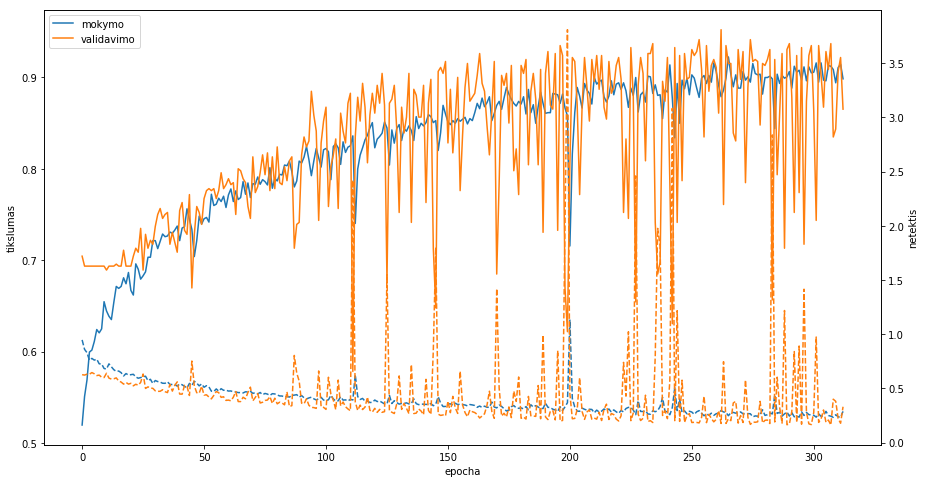

PID: 207.0 TRAIN: 1842 TEST: 3
train: x=(1381, 21, 77, 1) y=(1381, 1)
valid: x=(461, 21, 77, 1) y=(461, 1)
test : x=(3, 21, 77, 1)  y=(3, 1)
Train on 1381 samples, validate on 461 samples
Epoch 1/1000
 - 8s - loss: 0.9299 - acc: 0.5206 - val_loss: 0.6356 - val_acc: 0.6833
Epoch 2/1000
 - 0s - loss: 0.8472 - acc: 0.5749 - val_loss: 0.6422 - val_acc: 0.6855
Epoch 3/1000
 - 0s - loss: 0.7862 - acc: 0.5988 - val_loss: 0.6525 - val_acc: 0.6855
Epoch 4/1000
 - 0s - loss: 0.7846 - acc: 0.6054 - val_loss: 0.6594 - val_acc: 0.6855
Epoch 5/1000
 - 0s - loss: 0.7583 - acc: 0.6162 - val_loss: 0.6624 - val_acc: 0.6855
Epoch 6/1000
 - 0s - loss: 0.7451 - acc: 0.6162 - val_loss: 0.6682 - val_acc: 0.6876
Epoch 7/1000
 - 1s - loss: 0.7453 - acc: 0.6314 - val_loss: 0.6544 - val_acc: 0.6855
Epoch 8/1000
 - 1s - loss: 0.7183 - acc: 0.6387 - val_loss: 0.6541 - val_acc: 0.6855
Epoch 9/1000
 - 0s - loss: 0.6990 - acc: 0.6445 - val_loss: 0.6673 - val_acc: 0.6941
Epoch 10/1000
 - 0s - loss: 0.7073 - acc: 0.630

Epoch 95/1000
 - 1s - loss: 0.3871 - acc: 0.8197 - val_loss: 0.3210 - val_acc: 0.8872
Epoch 96/1000
 - 0s - loss: 0.3804 - acc: 0.8204 - val_loss: 0.4105 - val_acc: 0.8026
Epoch 97/1000
 - 1s - loss: 0.3885 - acc: 0.8161 - val_loss: 0.3364 - val_acc: 0.8612
Epoch 98/1000
 - 1s - loss: 0.4013 - acc: 0.8139 - val_loss: 0.3172 - val_acc: 0.8785
Epoch 99/1000
 - 1s - loss: 0.3805 - acc: 0.8269 - val_loss: 0.4955 - val_acc: 0.7766
Epoch 100/1000
 - 1s - loss: 0.4024 - acc: 0.8168 - val_loss: 0.3346 - val_acc: 0.8612
Epoch 101/1000
 - 1s - loss: 0.3777 - acc: 0.8349 - val_loss: 0.3286 - val_acc: 0.8547
Epoch 102/1000
 - 1s - loss: 0.3803 - acc: 0.8284 - val_loss: 0.4348 - val_acc: 0.7939
Epoch 103/1000
 - 0s - loss: 0.3846 - acc: 0.8320 - val_loss: 0.3498 - val_acc: 0.8568
Epoch 104/1000
 - 1s - loss: 0.4037 - acc: 0.8081 - val_loss: 0.3261 - val_acc: 0.8612
Epoch 105/1000
 - 1s - loss: 0.3795 - acc: 0.8132 - val_loss: 0.3448 - val_acc: 0.8200
Epoch 106/1000
 - 1s - loss: 0.3818 - acc: 0.824

Epoch 190/1000
 - 1s - loss: 0.2953 - acc: 0.8740 - val_loss: 0.1980 - val_acc: 0.9241
Epoch 191/1000
 - 0s - loss: 0.2876 - acc: 0.8711 - val_loss: 0.2375 - val_acc: 0.8915
Epoch 192/1000
 - 1s - loss: 0.2899 - acc: 0.8783 - val_loss: 0.2330 - val_acc: 0.9024
Epoch 193/1000
 - 1s - loss: 0.2609 - acc: 0.8943 - val_loss: 0.5482 - val_acc: 0.7961
Epoch 194/1000
 - 1s - loss: 0.3139 - acc: 0.8805 - val_loss: 0.2474 - val_acc: 0.8872
Epoch 195/1000
 - 1s - loss: 0.2921 - acc: 0.8783 - val_loss: 0.3191 - val_acc: 0.8633
Epoch 196/1000
 - 1s - loss: 0.3065 - acc: 0.8747 - val_loss: 0.2011 - val_acc: 0.9176
Epoch 197/1000
 - 1s - loss: 0.2891 - acc: 0.8885 - val_loss: 0.4790 - val_acc: 0.8113
Epoch 198/1000
 - 0s - loss: 0.2729 - acc: 0.8914 - val_loss: 0.2190 - val_acc: 0.9089
Epoch 199/1000
 - 1s - loss: 0.3020 - acc: 0.8812 - val_loss: 0.2064 - val_acc: 0.9219
Epoch 200/1000
 - 1s - loss: 0.2708 - acc: 0.8841 - val_loss: 0.2010 - val_acc: 0.9219
Epoch 201/1000
 - 1s - loss: 0.2591 - acc: 

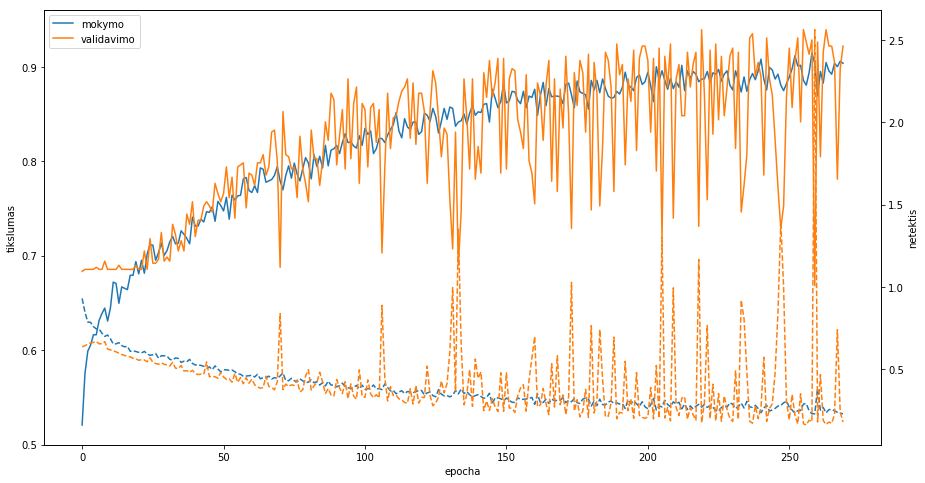

In [102]:
for train_index, test_index in gfold.split(X, Y, G):
    
    pid = G[test_index][0]
    print("PID:", pid,"TRAIN:", len(train_index), "TEST:", len(test_index))

    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    # x_valid = x_test
    # y_valid = y_test
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.25, random_state = 31)
    
    print(f"train: x={x_train.shape} y={y_train.shape}")
    print(f"valid: x={x_valid.shape} y={y_valid.shape}")
    print(f"test : x={x_test.shape}  y={y_test.shape}")
    
    model = get_model(cnn_input, cnn_output)
    
    optim = opt.SGD(lr = 0.001, decay = 1e-6, momentum = 0.5, nesterov=True)
    model.compile(loss='binary_crossentropy', optimizer=optim, metrics=['accuracy'])
    es = EarlyStopping(monitor='val_acc', min_delta = 0, patience = 50, verbose = 1, 
                       restore_best_weights = True)
    
    log = model.fit(x_train, y_train, batch_size = batch_size, epochs = 1000, 
          verbose = 2, validation_data=(x_valid, y_valid), callbacks = [ es ])
    
    result = model.evaluate(x_test, y_test)
    print('Testing:')
    print('\n'.join('{} = {}'.format(*k) for k in zip(model.metrics_names, result)))
    
    plt.rcParams['figure.figsize'] = (15, 8)

    plt.plot(log.history['acc'], label = 'mokymo')
    plt.plot(log.history['val_acc'], label = 'validavimo')
    plt.ylabel('tikslumas')
    plt.xlabel('epocha')
    plt.legend() #['mokymo', 'testavimo'])

    ax2 = plt.twinx()
    ax2.plot(log.history['loss'], '--', label = 'mokymo')
    ax2.plot(log.history['val_loss'], '--', label = 'validavimo')
    ax2.set_ylabel('netektis')
    plt.show()

    results[test_index, 1] = model.predict_classes(x_test).squeeze()
    results[test_index, 2] = model.predict(x_test).squeeze()
    

In [103]:
accuracy_score(Y, results[:,1])

0.5685636856368563

In [104]:
confusion_matrix(Y, results[:,1])

array([[970, 304],
       [492,  79]])

In [105]:
f1_score(Y, results[:,1])

0.16561844863731656

In [106]:
roc_auc_score(Y, results[:,2])

0.5159453381244725

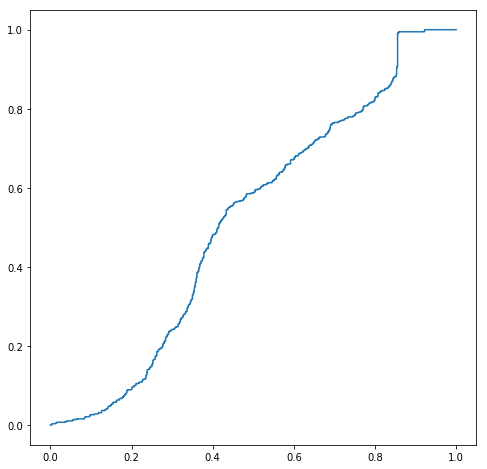

In [107]:
plt.rcParams['figure.figsize'] = (8, 8)
roc = roc_curve(Y, results[:,2])
plt.plot(roc[0],roc[1])
plt.show()

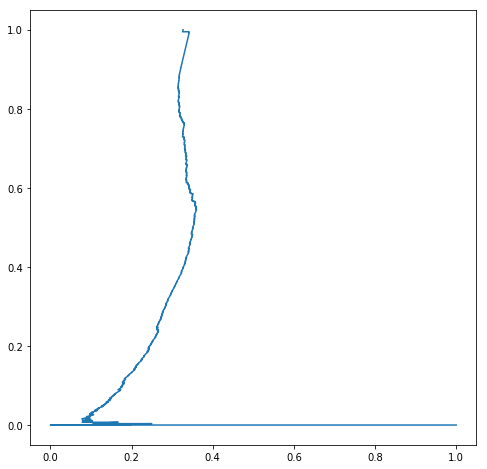

In [108]:
plt.rcParams['figure.figsize'] = (8, 8)
prc = precision_recall_curve(Y, results[:,2])
plt.plot(prc[0],prc[1])
plt.show()

In [109]:
average_precision_score(Y, results[:,2])

0.2930073618303124

In [110]:
precision_score(Y, results[:,1])

0.206266318537859

In [111]:
recall_score(Y, results[:,1])

0.138353765323993